# **Predicting The Bike Rental Demand**

**Submitted by : Elizabeth Sebastian**

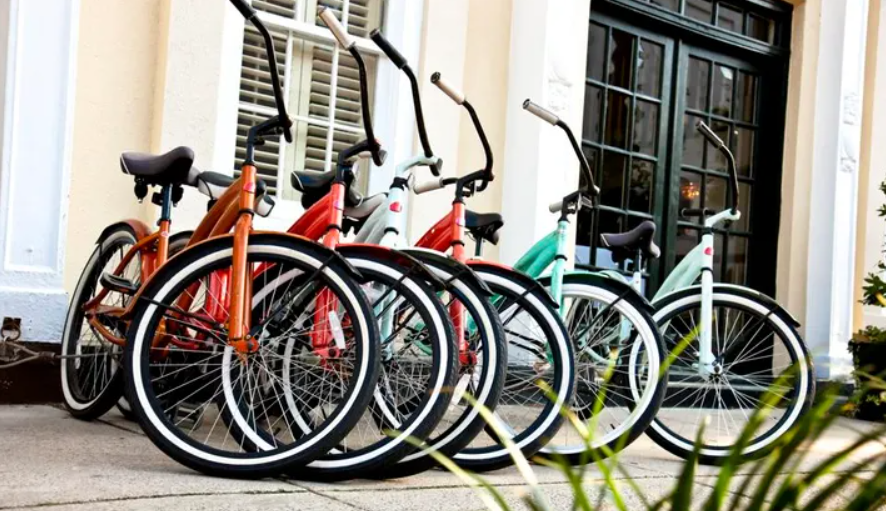

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing
5. Visualization
6. Data Splitting
7. Model Selection
8. Model Training and Evaluation (Without feature selection and hyperparameter tuning)
9. Feature Selection
10. Hyperparameter tuning
11. Pipline
12. Saving the model
13. Load the model




# **1. Introduction**

The project focuses on predicting the bike  rental demand using machine learning models. The goal is to develop a well-performing model that can predict the total count of rental bike, based on multiple features provided in the dataset.

We aim to:

Preprocess the dataset. Select the most important features. Train and evaluate multiple machine learning models . Tune hyperparameters to achieve the best possible performance. Analyze feature importance for interpretability.


# **2. Goal of the Project**

The main objective is to build a machine learning model that can accurately predict the number of bike retals, using various feature engineering techniques and machine learning models. The performance of the model will be evaluated.

# **3. Data Story**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system,  then
extracted and added the corresponding weather and seasonal information.

Source of the data is from   UC Irvine Machine Learning Repository.

Link : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset



**Dataset Description**

The dataset used in this project is the "Bike Sharing" dataset, which contains various features corresponding weather and seasonal information that incluence the  rental bike demand

Total rows: 17379, Total columns: 16 (including the target variable).

# **Features:**
**instant:** record index

**season :** season
                    (1:winter, 2:spring, 3:summer, 4:fall)

**yr :** year (0: 2011, 1:2012)

**mnth :** month ( 1 to 12)

**hr :** hour (0 to 23)

**holiday :** weather day is holiday or not

**weekday :** day of the week

**workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.

**weathersit :**

     1: Clear, Few clouds, Partly cloudy, Partly cloudy

     2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

     3:Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

     4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp :** Normalized temperature in Celsius. The values are divided to 41 (max)

**atemp:** Normalized feeling temperature in Celsius. The values are divided to 50 (max)

**hum:** Normalized humidity. The values are divided to 100 (max)

**windspeed:** Normalized wind speed. The values are divided to 67 (max)

**casual:** count of casual users

**registered:** count of registered users



**Target variable:**



**cnt**: count of total rental bikes including both casual and registered users


Here the casual and registered variables are not relevent because it is the subdivision of target variable.


**TOOL USED**
 The entire analysis was done using Python and its ML frameworks:

numpy, pandas, matplotlib, seaborn, scikit-learn .

**Pandas**: This library is essential for data manipulation and analysis. It provides tools for reading, cleaning, and transforming data into a suitable format for machine learning.

**NumPy:** This library is crucial for numerical computations and array operations. It's used for efficient mathematical calculations and matrix operations.

**Matplotlib and Seaborn:** These libraries are used for data visualization. They allow us to create various plots and charts to understand data distributions, relationships between variables, and identify trends.

**Scikit-learn:** This library provides a wide range of machine learning algorithms, including classification, regression, clustering, and model selection techniques. We used it to implement various models like liner regression,decision tree regressor,gradient boosting regressor,svr,random forest regressor.

# **Data Preprocessing**

**1.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load the dataset**

In [ ]:
# load the dataset
data=pd.read_csv("/content/Renatl Bike Sharing system hr.csv")
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**3.Understand the data structure**

In [ ]:
data.head()
# Display first few rows

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Check the shape of the data
data.shape


(17379, 16)

It shows there is 17379 rows and 16 columns

In [ ]:
# Shows the various information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


Dataset Overview

- 17379 rows (entries)
- 16 columns (features)
- Mix of integer (12) and float (4) data types

In [ ]:
# Describing the data
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000




The data.describe() method in pandas provided a summary of descriptive statistics for the DataFrame , which is focusing on numerical columns by default.In the count section, the number of non-null entries for each column is mentioned. This helps to identify missing data in each feature. The mean included arithmetic average of the data in each column, representing the central tendency. The sd measure show how much  the data points of each column are varied from the mean. A higher standard deviation indicates more variation in the data. The minimum value means the smallest value in the column. This helps in identifying any potential outliers at the lower end. 25th Percentile (25%) section includes the value below which 25% of the data falls. This helps to understand the lower quartile of the data. 50th Percentile (50%) / Median: means the value below which 50% of the data falls, also known as the median. This is a robust measure of central tendency and is less affected by outliers than the mean.75th Percentile (75%) section where the value below which 75% of the data falls, giving insight into the upper quartile of the data.In Maximum (max) section, the largest value in the column that were mentioned. This is useful for detecting outliers at the higher end of the data. But as there are many  features, its better to visualize, by boxplot or through histogram.

In [ ]:
# Dropping the unnecessary columns
data.drop(['instant','casual','registered'],axis=1,inplace=True)

Dropping the below coloumns:

1.instant

This coloumn is merely a sequence number of rows and does not provide any meaningful information for analysis or modeling.


2.casual and registered

The 'casual' and 'registered' columns are combined to form the 'total_count' column; therefore, we can also drop these columns. We cant have these coloumns while predicting total count as these coloumns greatly influence total count.



In [ ]:
# name of the columns
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

These are the columns available for further processing.

**4.Handle Missing Data**

In [ ]:
#Check for missing values in the dataset
# This will show the number of missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() was not used.

**5.Handle Duplicates**

In [ ]:
# checking the total of duplicates
data.duplicated().sum()

2

In [ ]:
data.drop_duplicates(inplace=True)


After Checking the duplicate values in the Dataset, it shows there are total 2 duplicate values here. So we drop the duplicates.

**6.Handle outliers**

In [ ]:
data.skew()

,0
season,-0.005253
yr,-0.010244
mnth,-0.009188
hr,-0.010903
holiday,5.638184
weekday,-0.003012
workingday,-0.785362
weathersit,1.227874
temp,-0.006004
atemp,-0.090436


Here the skewness is tested over all numerical columns in data dataframe. Skewness > 0: Right-skewed (tail on the right). Skewness < 0: Left-skewed (tail on the left). The output provides an overview of the skewness for each feature, which can be useful for understanding the distribution of the data and determining if any transformations (like log or square root) might be necessary for modeling or analysis.

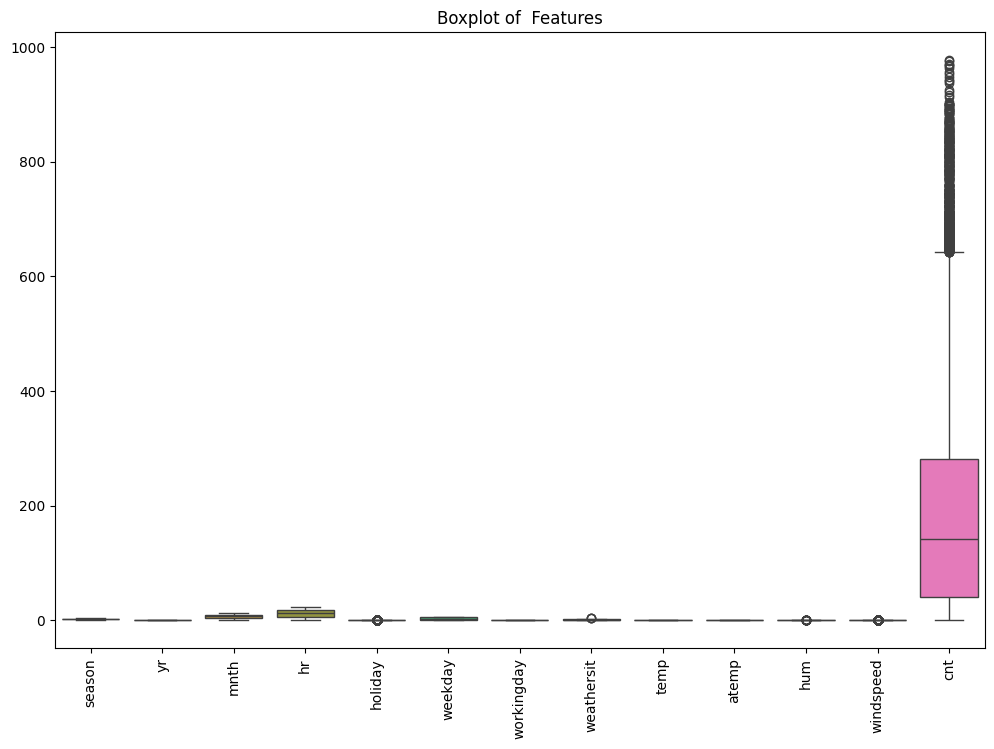

In [ ]:

# Create a boxplot to detect potential outliers in  data

plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

The code creates a combined boxplot for all numeric columns in the DataFrame num_df to check for outliers:

Figure Setup: A 12x8 inch figure is created. Boxplot Creation: It uses Seaborn's boxplot function to visualize all features. Title and Labels: The plot is titled "Boxplot of  Features" and x-axis labels are rotated for readability.  Display: The boxplot is rendered with plt.show(), allowing visual assessment of outliers.

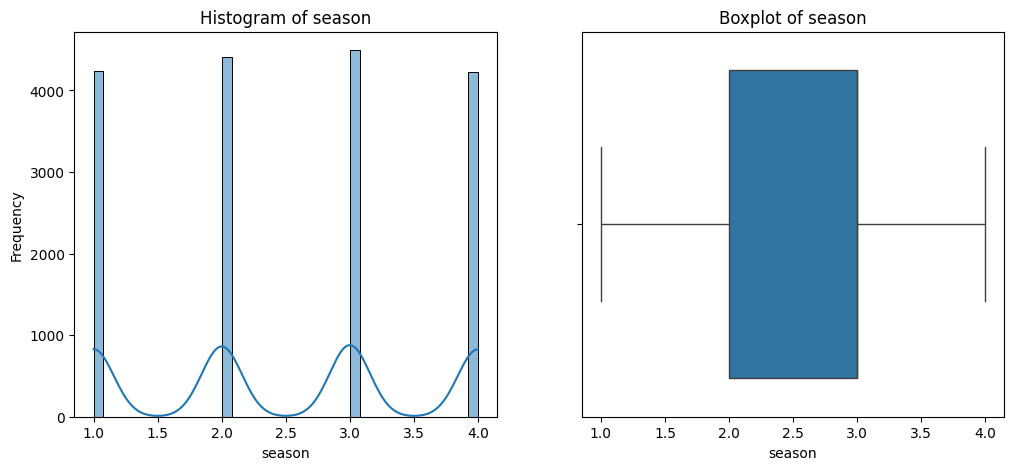

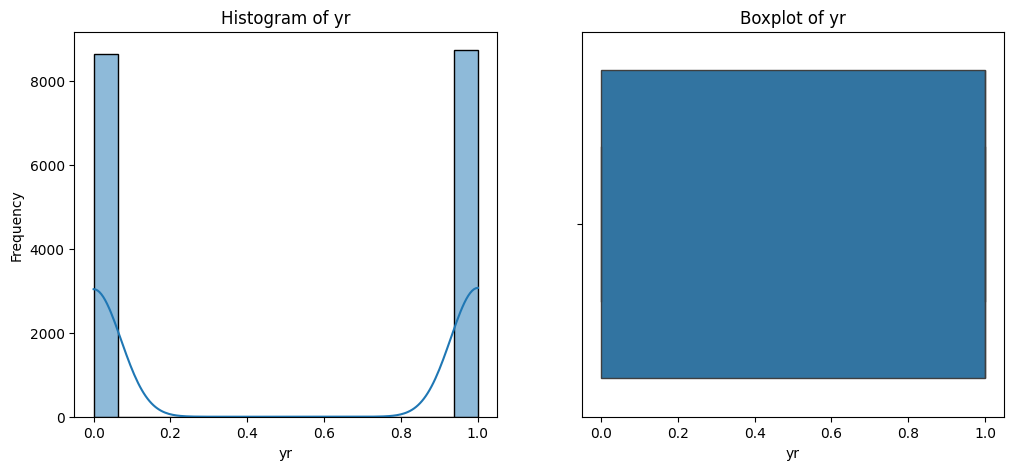

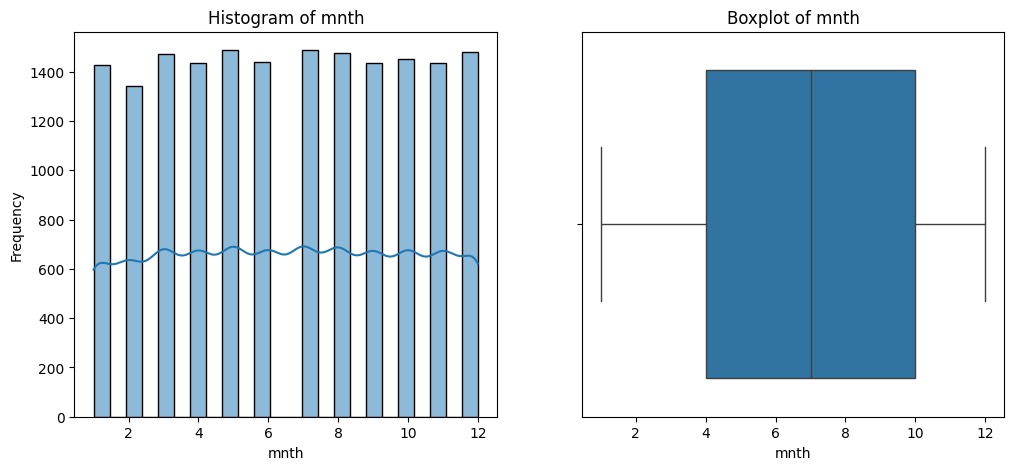

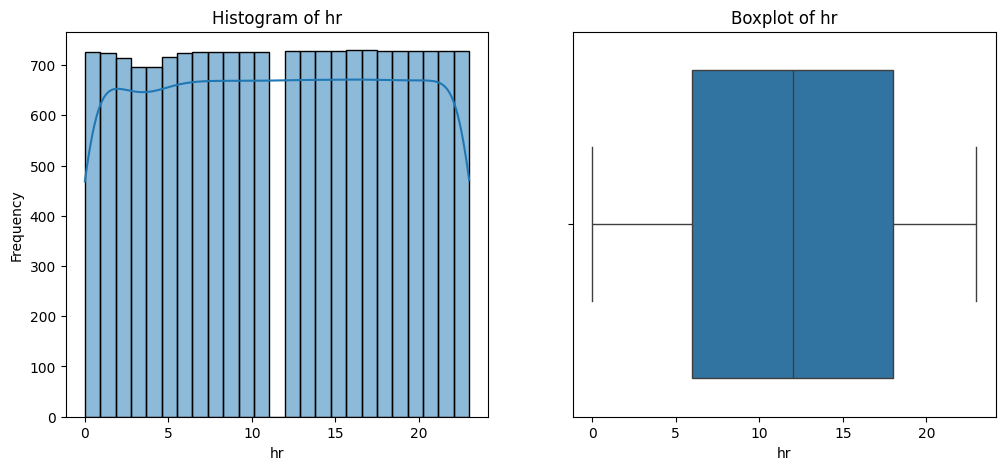

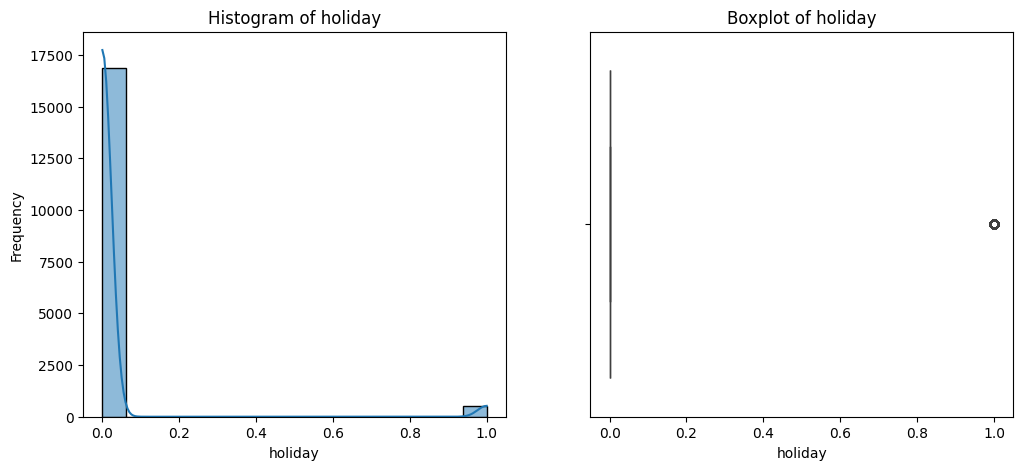

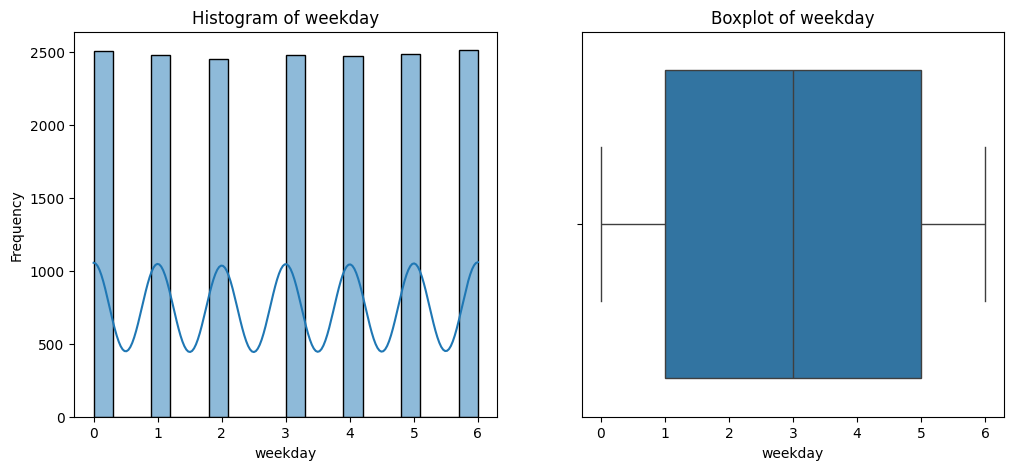

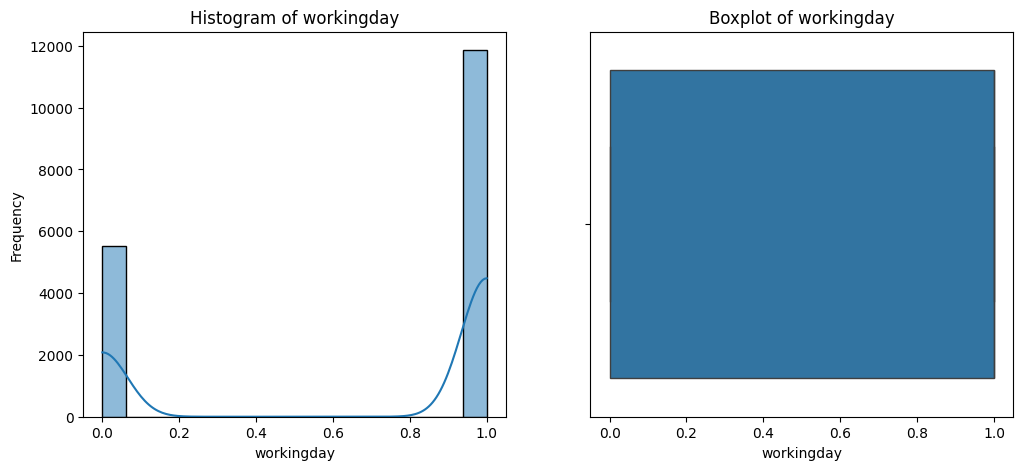

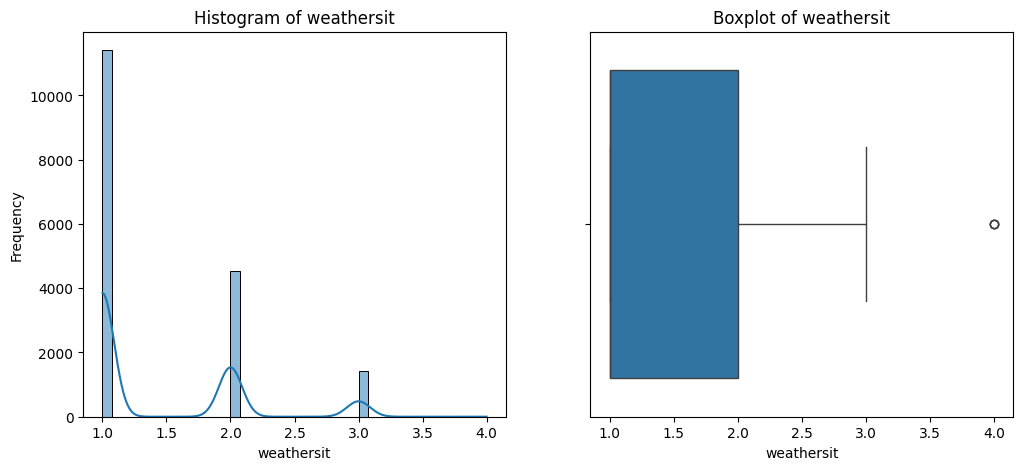

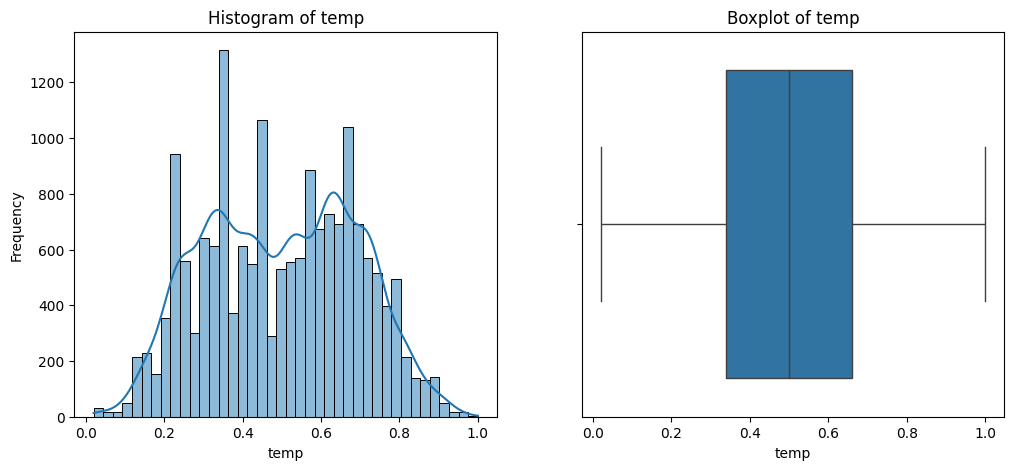

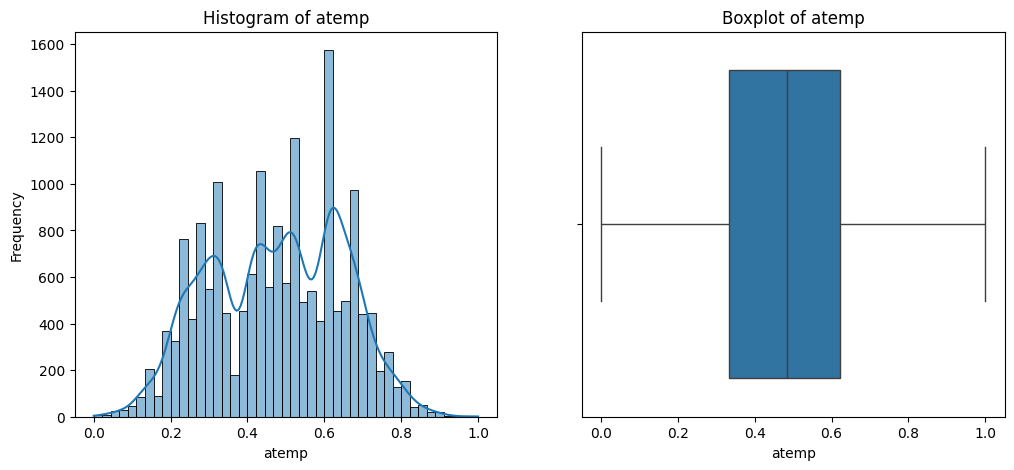

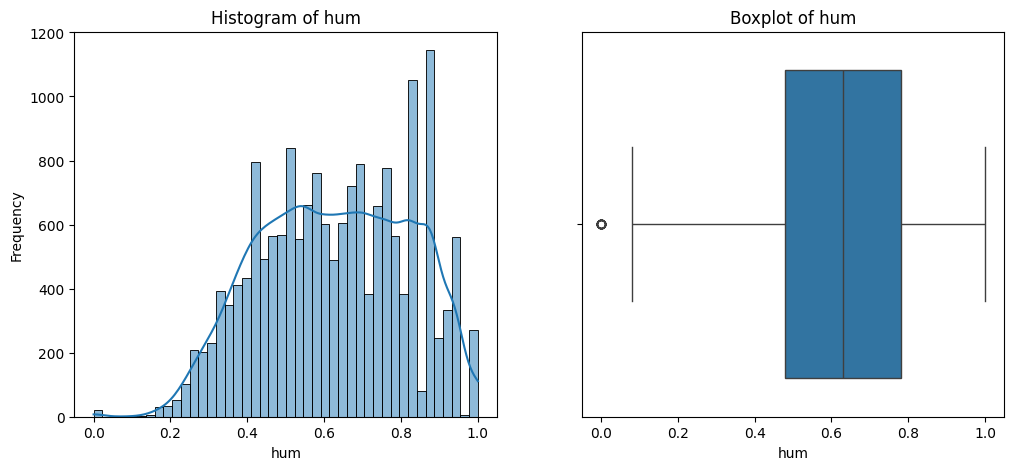

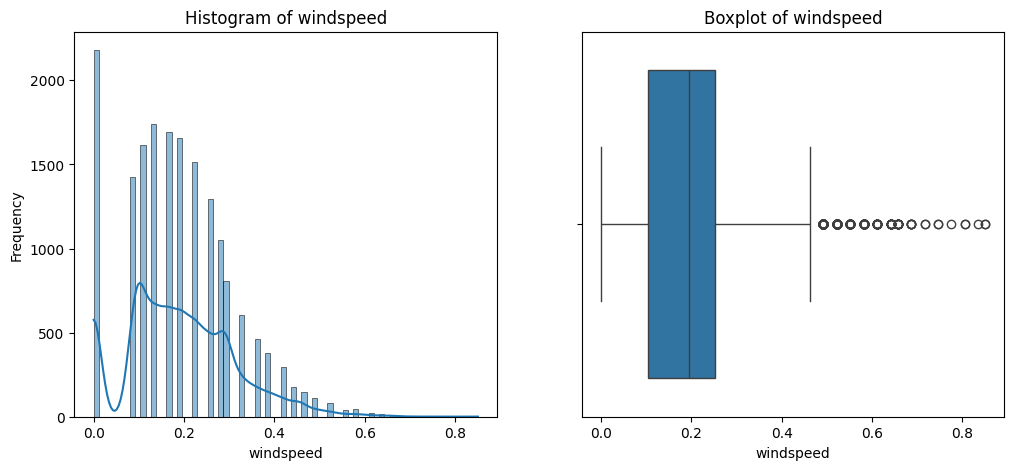

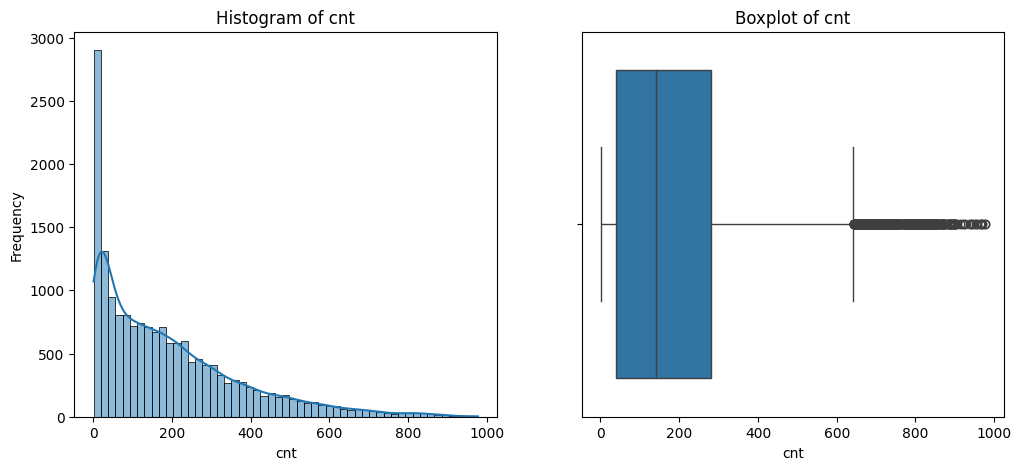

In [ ]:
for i in data.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot of {i}')

    plt.show()

The code visualizes each numeric column using histograms and boxplots to identify outliers:

Histogram with KDE: Displays the frequency distribution and shape of the data. Helps identify potential outliers in the tails.

Boxplot: Summarizes key statistics (median, interquartile range). Clearly shows outliers as points outside the whiskers.

These plots provide insights into data distribution and highlight extreme values effectively.

In [ ]:
data["holiday"].value_counts()

,count
holiday,
0,16877
1,500


Holiday shows more than 5 skewness so we check the value count distribution of holiday. Here the holiday feature shows a greater difference in  value count and it's unnecessary for predicting so drop the column.



In [ ]:
data.drop(['holiday'],axis=1,inplace=True)

In [ ]:
def remove_outliers(data,columns):
  data_filtered=data.copy()

  for column in columns:
     Q1 = data[column].quantile(0.25)
     Q3 = data[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered


The provided Python code defines a function to remove outliers from a given dataset using the Interquartile Range (IQR) method. It calculates the IQR for each specified column, determines the lower and upper bounds, and filters out data points that fall outside these bounds. This helps in cleaning the data and improving the accuracy of subsequent analysis.

In [ ]:
new_data=remove_outliers(data,['workingday','weathersit','windspeed','cnt'])

Removing the outliers from 'workingday', 'weathersit', 'windspeed', 'cnt' by using remove_ outliers function.

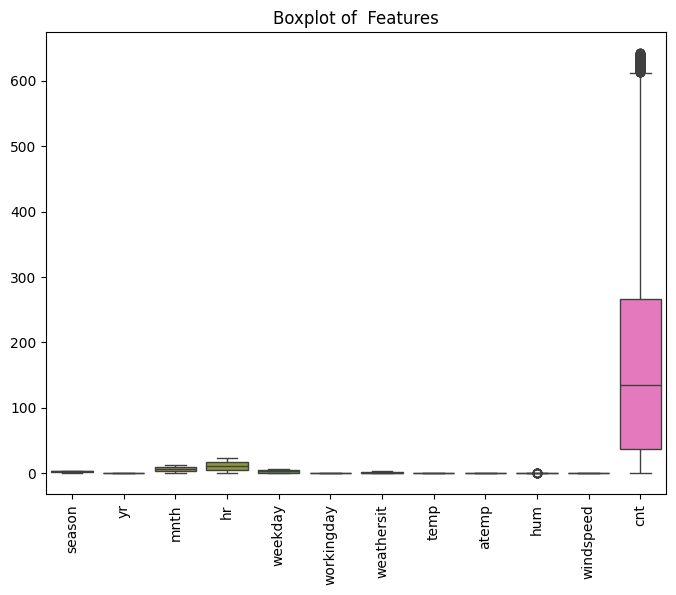

In [ ]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Here we can see there are still some outliers presented after outlier removal in some features.

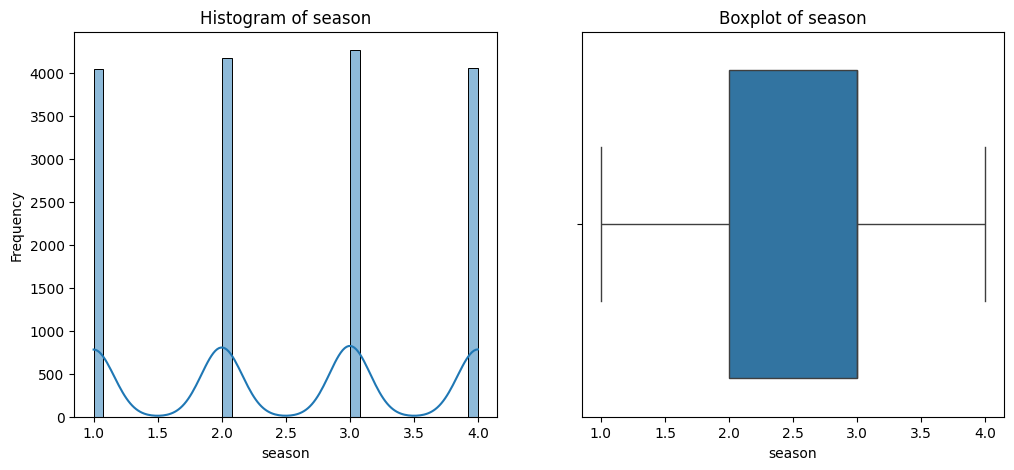

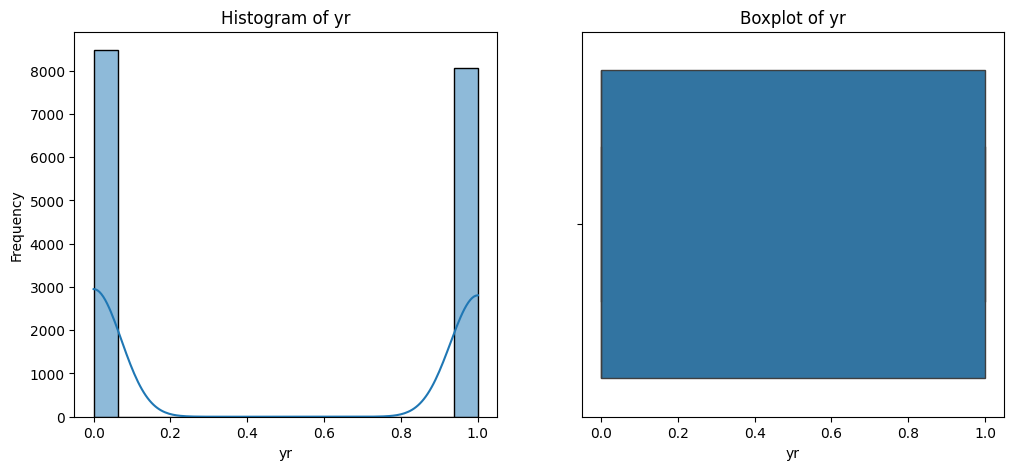

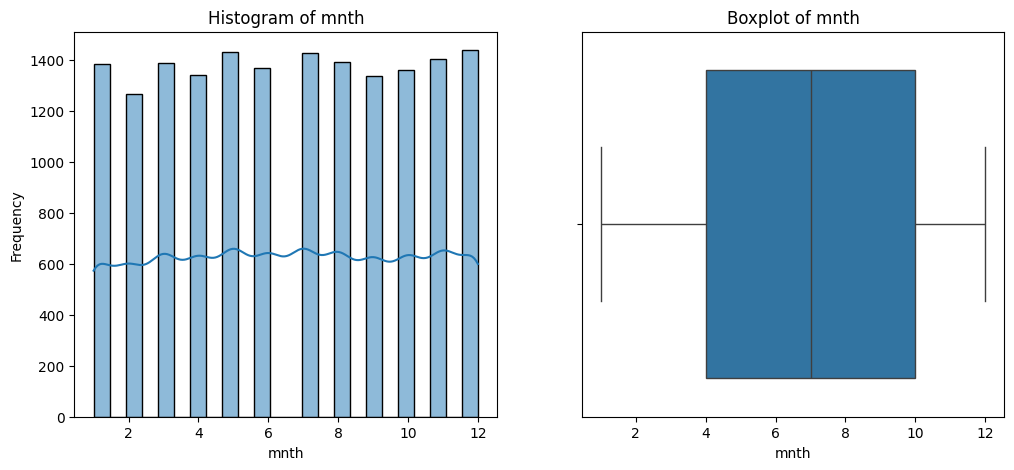

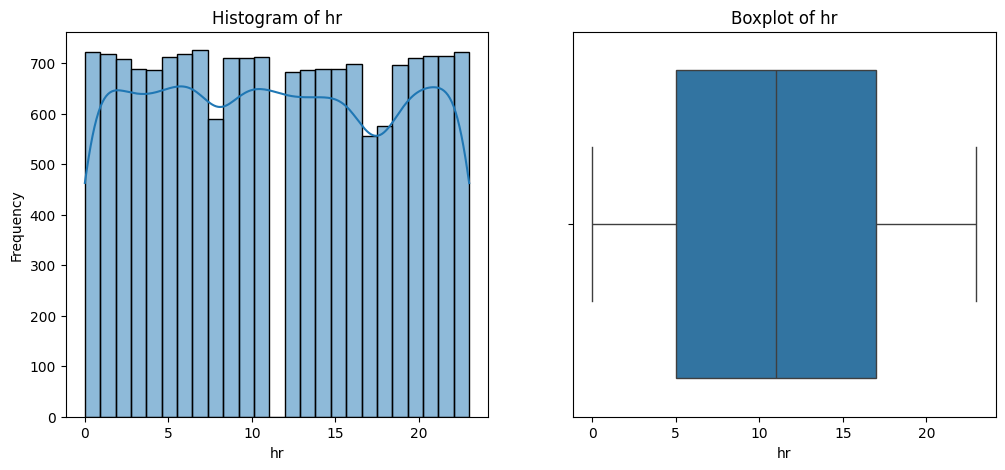

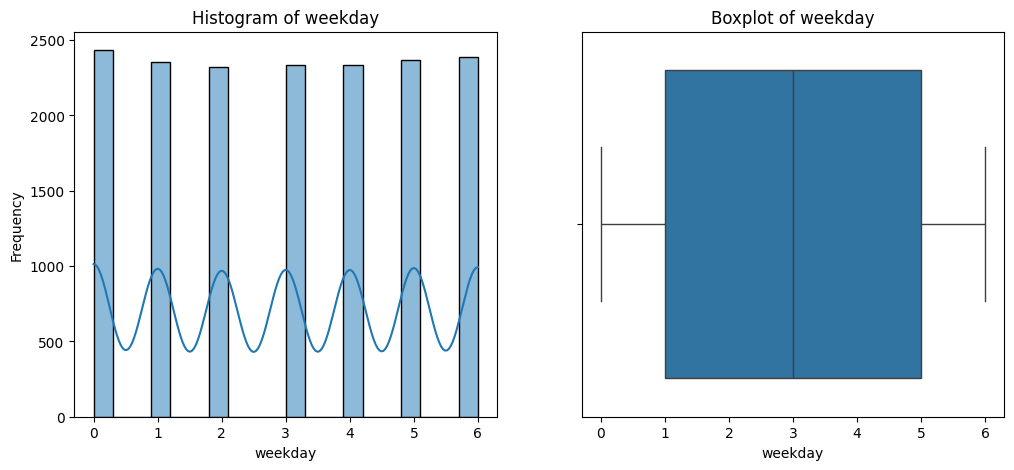

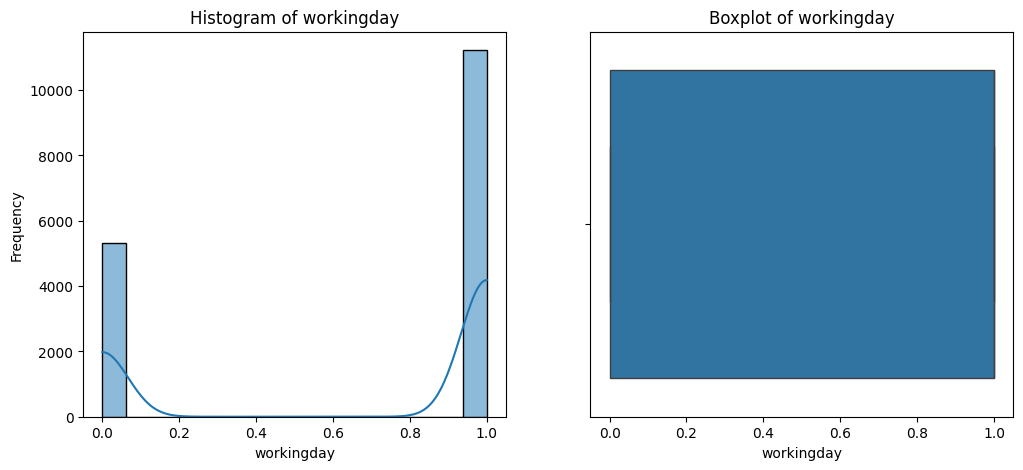

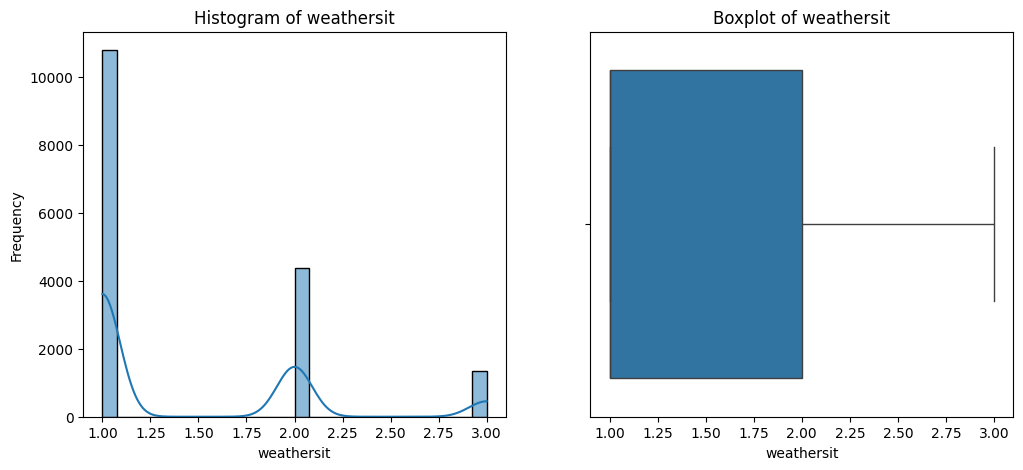

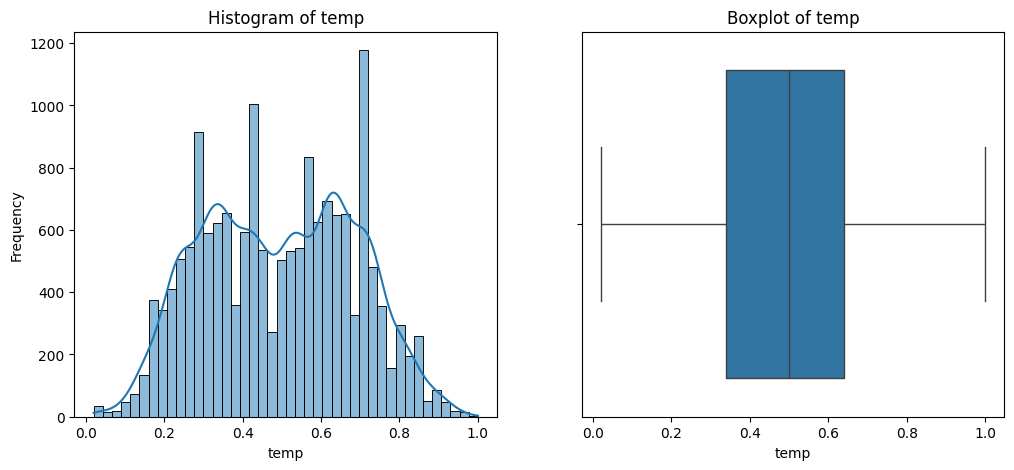

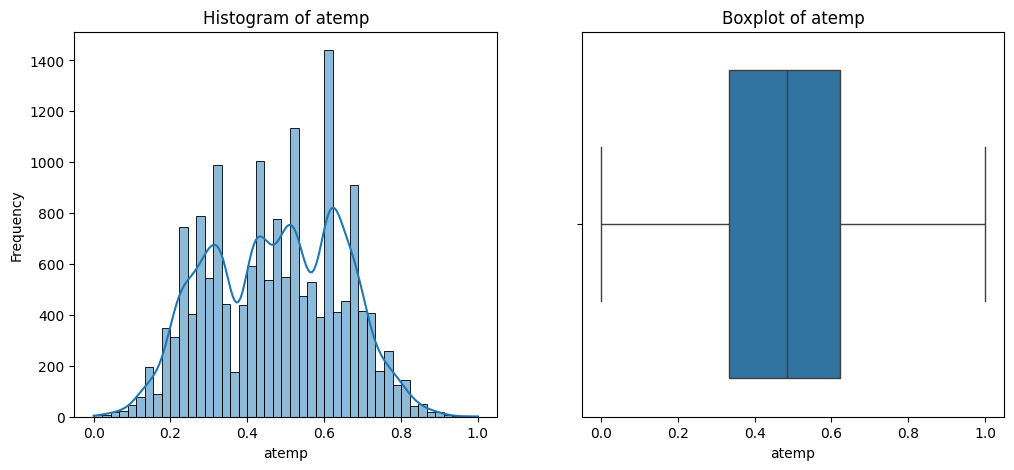

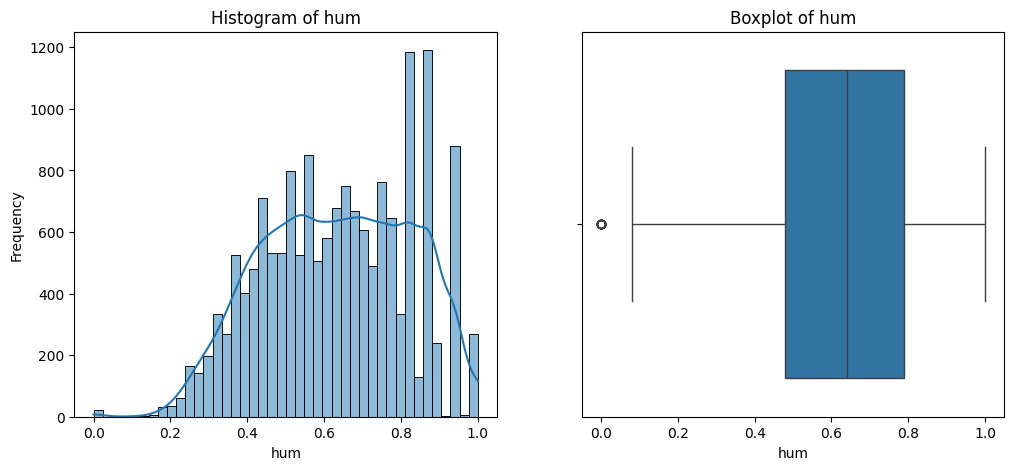

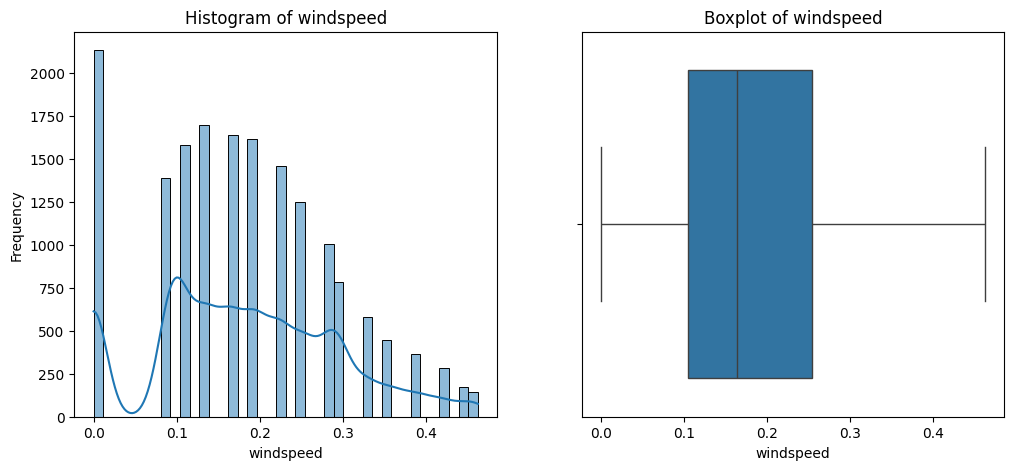

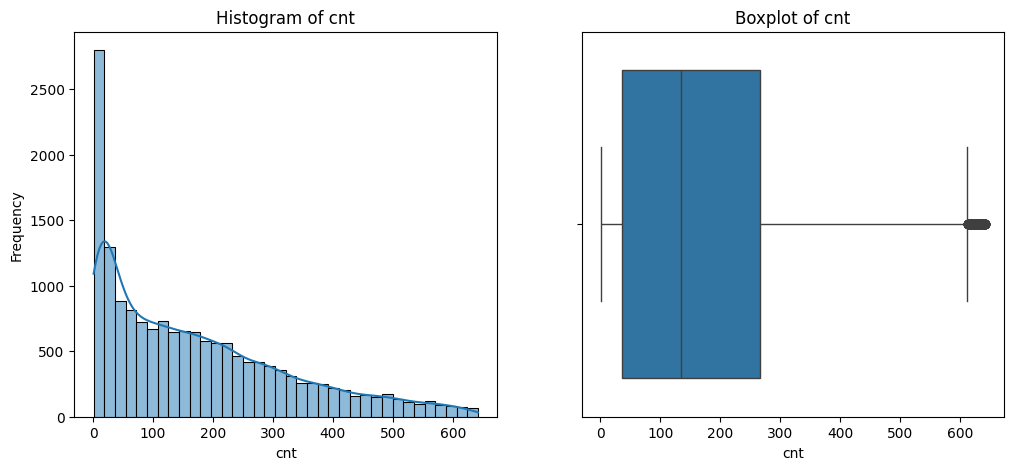

In [ ]:
for i in new_data.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(new_data[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_data[i])
    plt.title(f'Boxplot of {i}')

    plt.show()


In [ ]:
new_data.skew()

,0
season,-0.008125
yr,0.049845
mnth,-0.010593
hr,0.028373
weekday,0.000901
workingday,-0.766804
weathersit,1.206441
temp,0.015824
atemp,-0.060652
hum,-0.131877


After IQR method there is still outliers in cnt ,weathersit and workingday.

In [ ]:
# Step 2: Apply log transformation to skewed features
# We'll apply the log transformation to any feature with skewness > 1 or < -1
new_data= new_data.copy()
for col in new_data.columns:
    if new_data[col].skew() > 1 or new_data[col].skew() < -1:
        new_data[col] = np.log1p(new_data[col])

print("\nSkewness after log transformation:")
print(new_data.skew())



Skewness after log transformation:
season       -0.008125
yr            0.049845
mnth         -0.010593
hr            0.028373
weekday       0.000901
workingday   -0.766804
weathersit    0.977183
temp          0.015824
atemp        -0.060652
hum          -0.131877
windspeed     0.229032
cnt           0.929696
dtype: float64


In [ ]:
new_data.shape

(16538, 12)

In [ ]:
new_data.skew()

,0
season,-0.008125
yr,0.049845
mnth,-0.010593
hr,0.028373
weekday,0.000901
workingday,-0.766804
weathersit,0.977183
temp,0.015824
atemp,-0.060652
hum,-0.131877


After log transformation, the skewness is reduced.

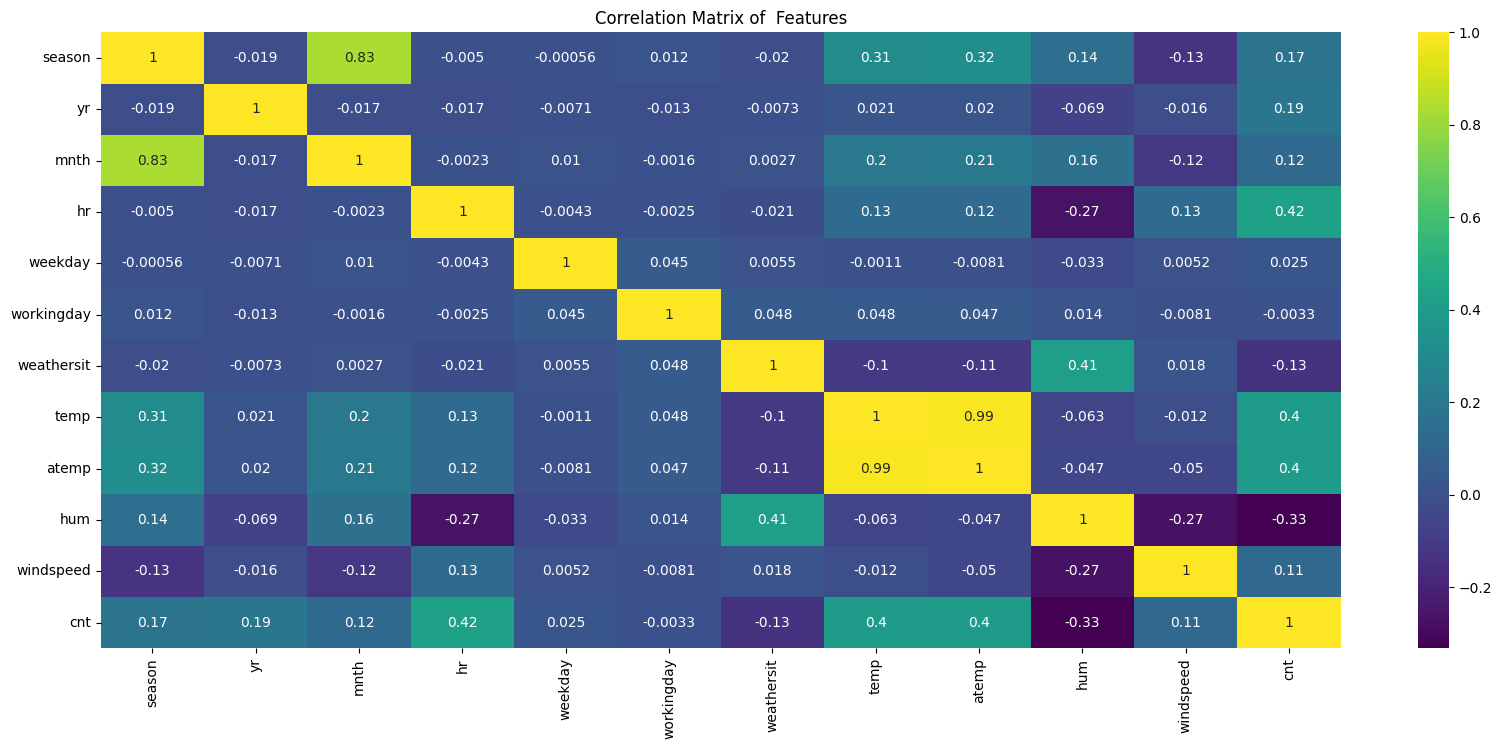

In [ ]:
#Correlation Matrix for variables
# This heatmap will help you understand relationships betweenl features
plt.figure(figsize=(20,8))
sns.heatmap(new_data.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

The code computes the correlation matrix of all numerical features in the DataFrame using .corr(). A heatmap is created using Seaborn to visually represent the correlations between all features, where stronger correlations (positive or negative) are highlighted. The heatmap uses a 'viridis' color palette, and annotations are added to display the exact correlation values.  This helps identify features that are highly correlated with the target, which can assist in feature selection for predictive modeling.

This correlation matrix visualizes the relationships between various features in the bike rental dataset. Here are some insights from the matrix:

* Temperature and Bike Rentals:

  Both temp and atemp (actual and perceived temperature) have a positive correlation with cnt (total bike rentals), with a correlation coefficient of around 0.4. This suggests that bike rentals increase with warmer weather, which aligns with typical outdoor activity patterns.
* Hour and Bike Rentals:

  The hr feature has a moderate positive correlation with cnt (0.42). This indicates that the time of day significantly impacts bike rental counts, possibly reflecting peak usage hours (e.g., morning and evening commute times).
* Weather Situation and Rentals:

  The weathersit feature has a negative correlation (-0.13) with cnt. This suggests that poor weather conditions (such as rain or mist) may reduce bike rentals, as expected.
* Humidity and Rentals:

  Humidity (hum) shows a negative correlation with cnt (-0.33), indicating that higher humidity levels may discourage bike rentals, possibly due to discomfort in humid weather.
* Yearly Increase:

  The yr feature has a positive correlation (0.19) with cnt, suggesting that bike rentals increased in the second year (2012) compared to the first year (2011). This could reflect growing popularity or an expanding user base.
* Multicollinearity Concerns:

  temp and atemp are highly correlated (0.99), which indicates redundancy. Including both in predictive models could lead to multicollinearity, so one of these variables could be dropped or used with regularization techniques.
* Seasonal Trends:

  The season variable has a moderate positive correlation (0.17) with cnt, suggesting that certain seasons have higher rental counts, possibly due to more favorable weather in spring or summer.
* Weak Correlations with Day-Based Features:

  Variables such as weekday and workingday have weak correlations with cnt. This may suggest that bike rentals do not vary significantly between weekdays and weekends, or between working and non-working days, which could be due to consistent commuter or recreational use.

These insights could guide feature selection, engineering, and understanding of key factors influencing bike rental demand.

# **Data Visualization**

Libraries for visualization are: matplotlib and seaborn.

**Distribution of bike rental data (cnt)**

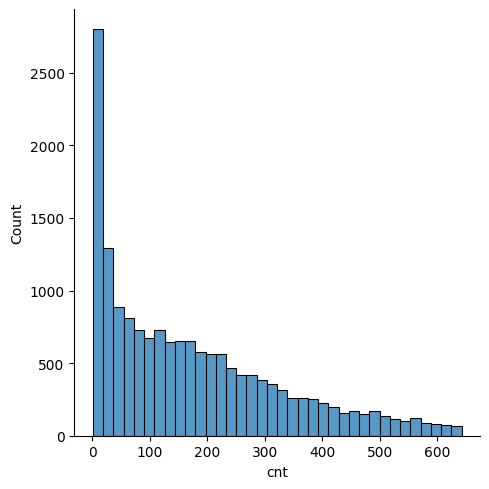

In [ ]:
sns.displot(new_data["cnt"])


 It should show you a visual representation of the distribution of bike rental data (cnt). Here we can see the  higher frequency for a lower  count of rental bike .

**Monthly Variation of Temp, Atemp, Humidity, and Windspeed**

Time Series Visualization of line graph over months

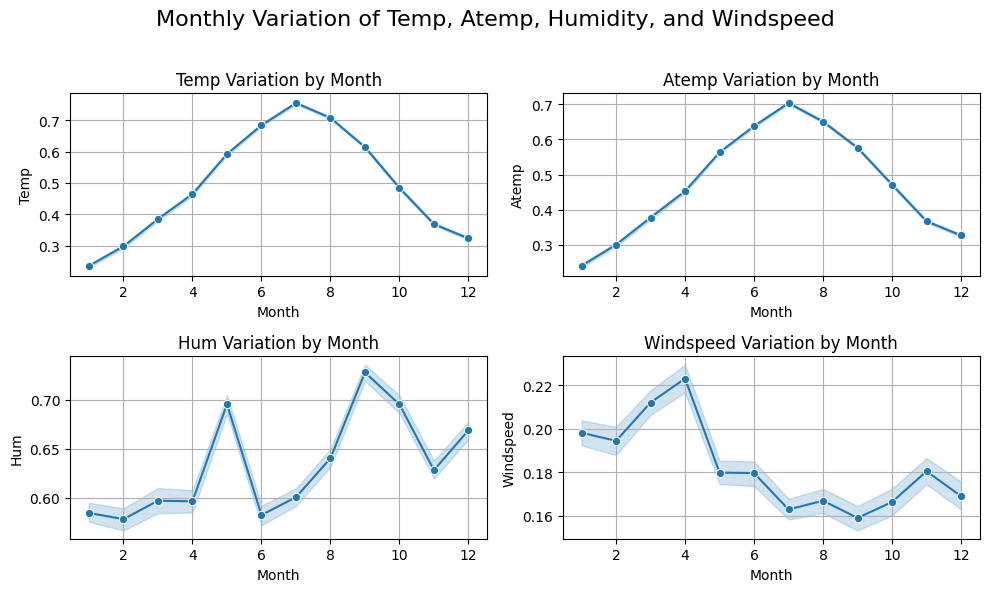

In [ ]:

# Plotting the variation of temperature, apparent temperature, humidity, and windspeed by month

# Assuming your data is in a pandas DataFrame named 'new_data'
df_visualise = new_data  # Assign 'new_data' to 'df_visualise'

columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    # Use Seaborn's lineplot
    sns.lineplot(x='mnth', y=column, data=df_visualise,
                 ax=ax, marker='o')
    ax.set_title(f'{column.capitalize()} Variation by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(column.capitalize())
    ax.grid(True)

fig.suptitle('Monthly Variation of Temp, Atemp, Humidity, and Windspeed', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()





*Inference*

temp : normal distribution with max temp around july

atemp : normal distribution with max temp around july

By Looking at the above plots,we can understand the temperature rise and fall after summer and it is a uniform rise and fall with not much variation.

hum : It appears that humidity is higher in some months (April-June & August-October) and lower in others (Jan-Feb). T00 much variation is seen.

windspeed : windspeed is highest during April and low in subsequent months.

**Total Count of bikes rented over different Season**


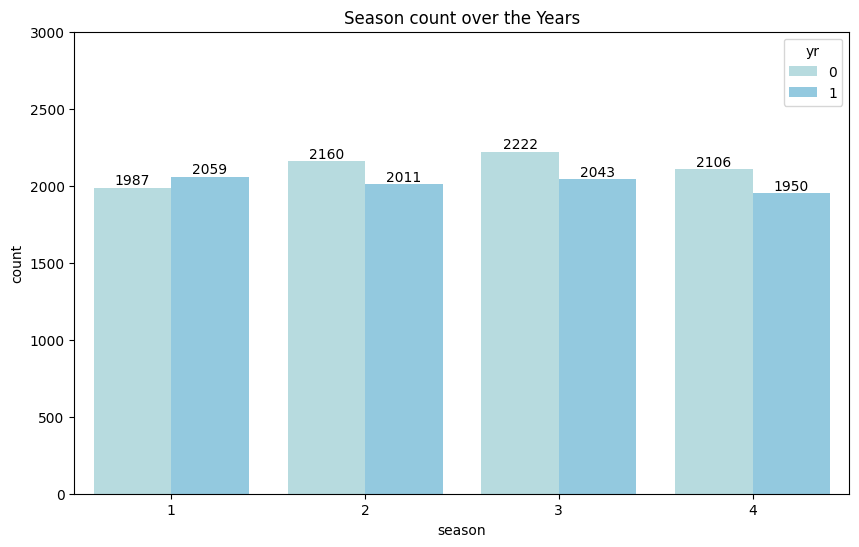

In [ ]:
# The  graph type is a grouped bar chart (or clustered bar chart)
fig = plt.figure(figsize = (10,6))  #Create a figure and axes
ax = sns.countplot(data = new_data, x = 'season', hue = 'yr', palette = ['powderblue', 'skyblue'])
plt.ylim(0,3000)   #Set y-axis limits and title
plt.title('Season count over the Years')
for container in ax.containers:  #Add bar labels
    ax.bar_label(container)

plt.show() #Show the plot

*Inference*

It shows the distribution of bike rentals over different seasons, broken down by year are almost same.


The code creates a countplot that shows the distribution of bike rentals over different seasons, broken down by year. It sets the size of the plot, colors the bars, sets the y-axis limits, adds a title, and labels each bar with its count. Finally, it displays the plot.

Add bar labels:

for container in ax.containers:
       ax.bar_label(container)
This loop iterates through the bars (containers) in the countplot and adds a label above each bar to display its count.

**Histogram of ATemperature by Season with KDE**

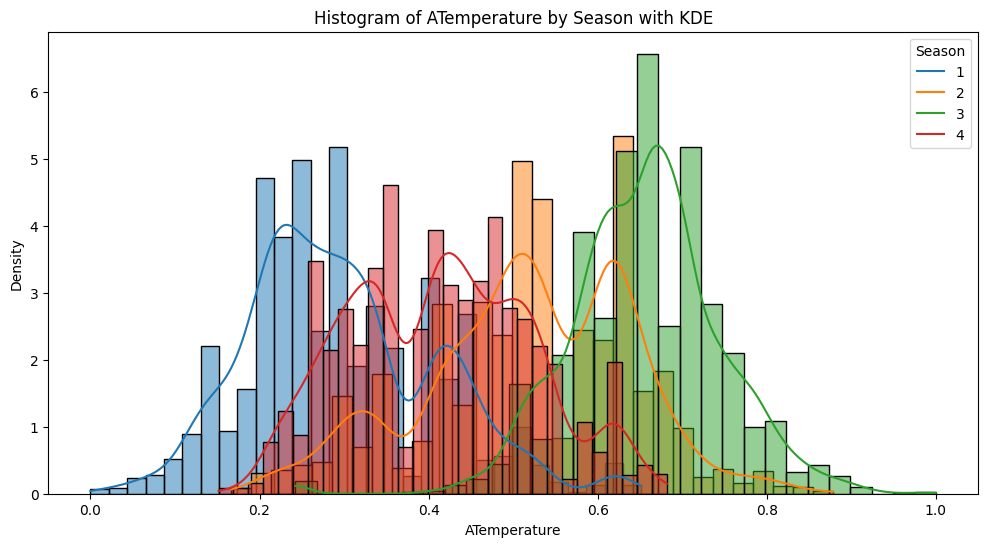

In [ ]:
# Histogram of ATemperature by Season with KDE
# Create a stacked histogram showing the distribution of apparent temperature (ATemp) across seasons, with KDE overlaid for each season.

# Define the order of the seasons
season_order = [1,2,3,4]

# Create the stacked histogram with separate KDE plots for each season
plt.figure(figsize=(12, 6))
for season in season_order:
    sns.histplot(data=new_data[new_data['season'] == season], x='atemp', bins=30, kde=True, label=season, stat='density')

#plotting the graph
plt.xlabel('ATemperature')
plt.ylabel('Density')
plt.title('Histogram of ATemperature by Season with KDE')
plt.legend(title='Season', labels=season_order)
plt.show()


*Inference*

This histogram with Kernel Density Estimate (KDE) plots illustrates the distribution of perceived temperature (atemp) across different seasons in the bike rental dataset. Here are some insights from the plot:

* Temperature Variations by Season:

  Season 1 (Winter, blue): The perceived temperature (atemp) is concentrated in the lower range, mostly between 0.0 and 0.4, which reflects the colder weather typical of winter.

  Season 2 (Spring, orange): Temperatures start to increase, with values mostly between 0.2 and 0.6, indicating milder spring temperatures.

  Season 3 (Summer, green): The distribution shifts to higher perceived temperatures, mostly between 0.4 and 0.8, which aligns with warmer summer weather.

  Season 4 (Fall, red): Fall temperatures are spread between 0.2 and 0.6, similar to spring, though with a slightly wider distribution, suggesting varied weather.

* Temperature Overlap in Spring and Fall:

  Spring and fall seasons show overlapping temperature ranges, likely because these transitional seasons have similar mild temperatures. However, fall appears to have more instances of lower temperatures compared to spring.
* Distinct Temperature Range for Summer:

 Summer shows a clear shift towards higher perceived temperatures compared to other seasons, indicating the most consistently warm period, which likely corresponds with higher bike rentals based on temperature correlations.
*  Winter Temperature Concentration:

  Winter has a narrower and lower temperature range, suggesting that bike rentals might be lower in this season, as colder temperatures could discourage biking.

These temperature distributions provide context for how weather influences bike rental patterns, with warmer seasons likely driving higher rentals. This insight could be helpful for predicting demand or planning bike availability across seasons.

**Impact of Temperature, Feeling Temperature, Humidity, and Windspeed on Bike Rental Counts**

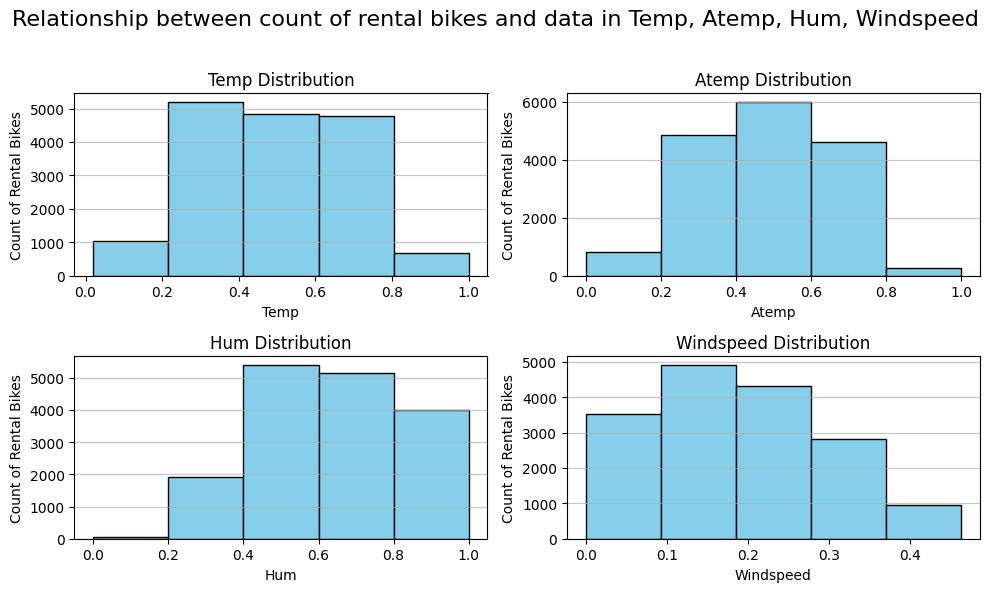

In [ ]:
# Impact of Temperature, Feeling Temperature, Humidity, and Windspeed on Bike Rental Counts
#plotting histogram for understanding the relationship between count and coloumns ['temp', 'atemp', 'hum', 'windspeed']



columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Relationship between count of rental bikes and data in Temp, Atemp, Hum, Windspeed', fontsize=16)


for i, column in enumerate(columns_to_plot):
    ax = axs.flatten()[i]  # Flatten and access axes directly
    ax.hist(df_visualise[column], bins=5, color='skyblue', edgecolor='black')
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count of Rental Bikes')
    ax.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0, 1, 0.96])  #the bounding box for the subplot adjustments
plt.show()

*Inferences*

Temp : People tend to rent bikes more frequently when the temperature is moderate. The highest number of rentals occurs in the temperature range of 8°C to 32°C, indicating a preference for warm, but not too hot conditions. Very low and very high temperatures see fewer rentals, suggesting that extreme temperatures are less favorable for biking.

Atemp : Apparent temperature, which reflects the perceived temperature, shows a similar trend to actual temperature. The most popular range for bike rentals is between 20.0°C and 30.0°C, suggesting that people prefer to rent bikes when it feels warm but still comfortable. Very low or very high apparent temperatures correspond to significantly fewer rentals, highlighting the importance of comfort in perceived temperature for outdoor activities like biking.

Humidity: Humidity levels have a significant impact on bike rentals. The highest number of rentals is observed when humidity is between 40.0% and 80.0%, suggesting that moderate humidity is the most comfortable for biking. As humidity increases or decreases from this range, the number of rentals drops, indicating that very dry or very humid conditions are less favorable for bike riding.

Windspeed: People prefer to rent bikes when the wind speed is the lowest. The majority of rentals occur when the wind speed is till 12 m/s, indicating that calmer conditions are more preferred to biking. As the wind speed increases, the number of rentals sharply declines, suggesting that high wind speeds are less favorable and potentially more challenging or uncomfortable for biking activities.

**Bike Rentals by Months**


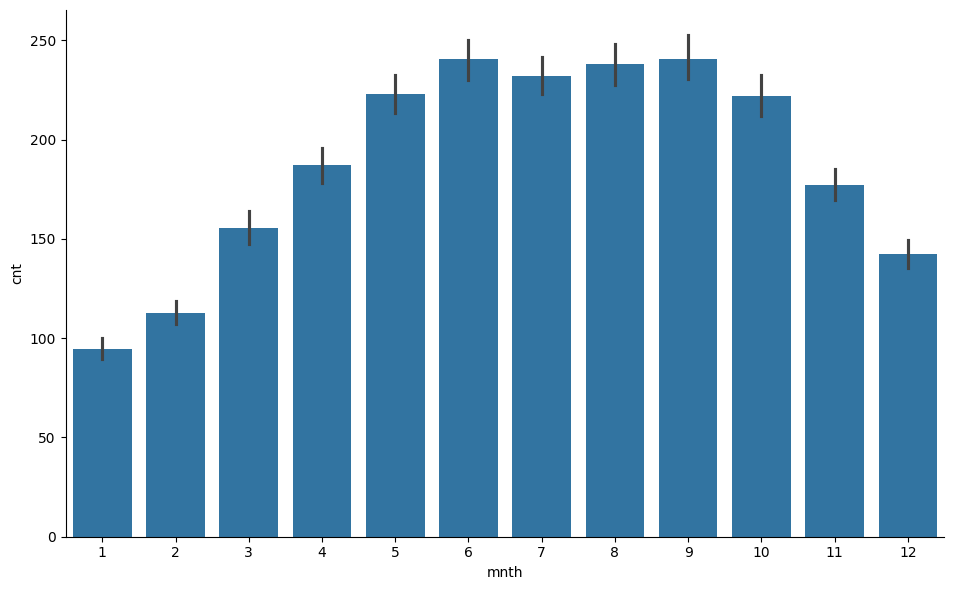

In [ ]:
sns.catplot(x="mnth", y="cnt", data=data, kind='bar', height=6, aspect=1.6, estimator=np.mean);


*Inference*

Average number of bikes rented is low for months - December, January, February. This can be due to the cold weather in these months.
Average number of bikes rented is consistently high for months from May to October.

**Distribution of weather type**

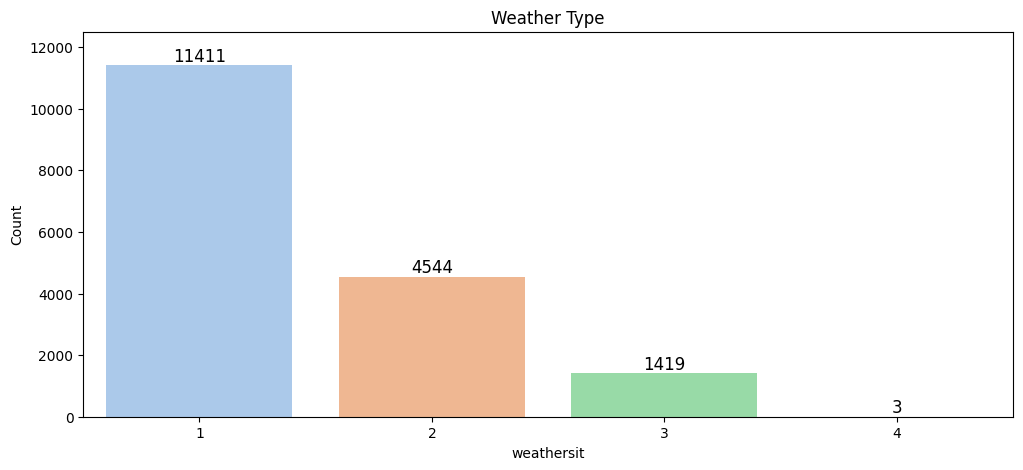

In [ ]:
# Distribution of weather type
plt.figure(figsize=(12, 5))  # Set figure size directly
sns.countplot(data=data, x='weathersit', hue='weathersit', palette='pastel', order=data['weathersit'].value_counts().index, legend=False)
plt.title('Weather Type', fontsize=12)
plt.ylabel('Count')
plt.ylim(0, 12500)

# Adding bar labels
for p in plt.gca().patches:  # Get the bar patches from the current axes
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                 fontsize=12, color='black', ha='center', va='bottom')

plt.show()


Bike Rentals by weather

*Inferences*

Clear, Few clouds, Partly cloudy: This weather condition has the highest number of rides. It indicates that people are more likely to use bikeshare services during clear or slightly cloudy weather.

Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: This weather condition has a moderate number of rides compared to clear weather. It suggests that while misty and cloudy conditions may reduce the number of rides compared to clear weather, there is still a considerable demand for bikeshare services.

Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds: These conditions have the lowest number of rides among the listed weather types. It indicates that people are less likely to use bikeshare services during light snow or rain with scattered clouds, possibly due to safety concerns or discomfort.

Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog: These extreme weather conditions have an extremely low number of rides, both in registered and casual categories. It suggests that bikeshare usage significantly drops during heavy rain, thunderstorms, snow, and fog, highlighting the strong impact of severe weather on bikeshare ride usage.

**Bike rentals by days**

     weekday     cnt
0     Sunday  417905
1     Monday  392604
2    Tuesday  396739
3  Wednesday  392377
4   Thursday  403699
5     Friday  428323
6   Saturday  428465




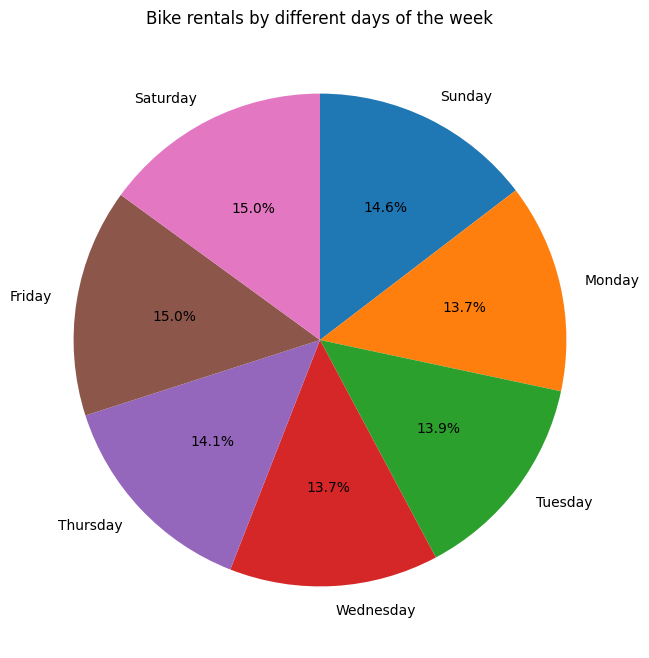

In [ ]:
#Bike rentals by days
# Understanding the rentals on different days of week

# Data preparation
weekday_counts = df_visualise.groupby('weekday')['cnt'].sum().reset_index()


# Define the days of the week for labeling the pie chart
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Map weekday numbers to day names
weekday_counts['weekday'] = weekday_counts['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekday_counts['cnt'], labels=weekday_counts['weekday'], startangle=90, counterclock=False, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Bike rentals by different days of the week')

print(weekday_counts)
print("\n")
plt.show()

Bike rentals by days

*Inferences*

The data shows a relatively equal distribution of bikeshare ride counts across weekdays, with a slight increase or decrease of around 1% among the days.
Weekdays, especially Thursday and Friday, exhibit higher ride counts compared to weekends, where Saturday and Sunday demonstrate lower usage patterns. ( even this difference is around than +-1%)

**Scatter plot of bike rentals vs Temperature, Feeling Temperature, Humidity, and Windspeed**

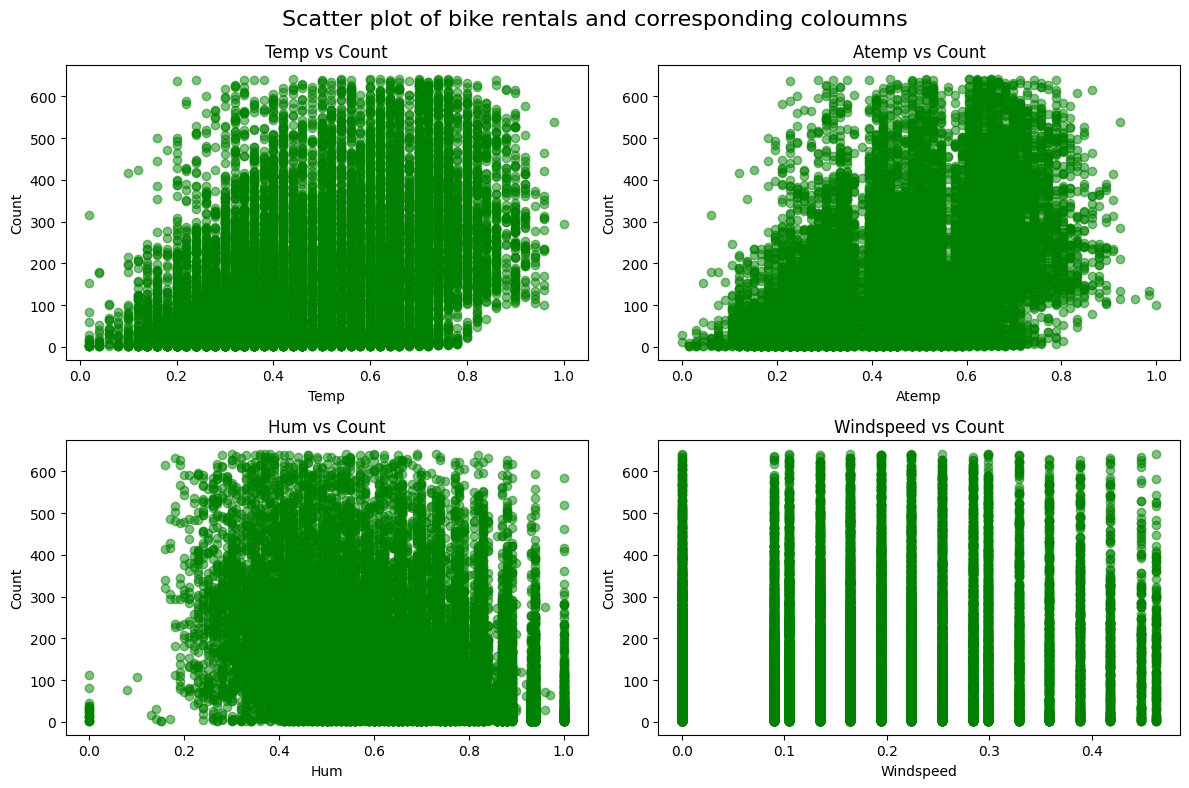

In [ ]:
#Scatter plot of bike rentals vs Temperature, Feeling Temperature, Humidity, and Windspeed
columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.scatter(df_visualise[column], df_visualise['cnt'], alpha=0.5, color='green')
    ax.set_title(f'{column.capitalize()} vs Count')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')

# Add a common title for all subplots
fig.suptitle('Scatter plot of bike rentals and corresponding coloumns', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the super title
plt.tight_layout()
plt.show()


Scatter plot of bike rentals vs Temperature, Feeling Temperature, Humidity, and Windspeed

*Inferences*

The scatter plot of cnt versus temp and cnt versus atemp reveals that the number of bikeshare rides rises as the temperature increases. This indicates a correlation between temperature and the number of bikeshare rides.

In contrast, the scatter plot of hum versus cnt shows people prefer lower humidity.

The scatter plot of cnt versus windspeed suggests that the number of bikeshare rides tends to decrease as windspeed increases. We can see most bike rides at the beginning and as windspeed increases scatter decreases.

**Draw the histogram to know which hour is the peak**

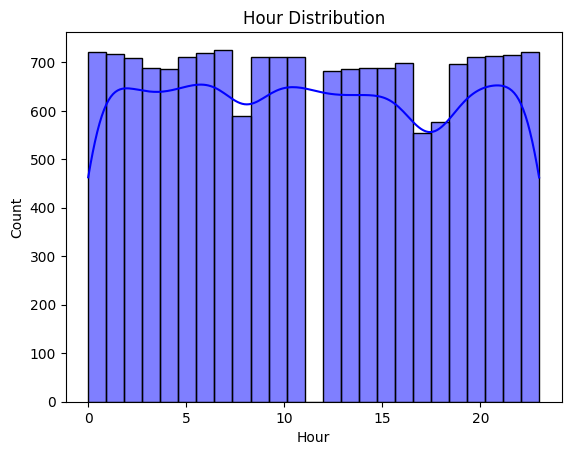

In [ ]:
# Draw the histogram to know which hour is the peak
sns.histplot(new_data['hr'], kde=True, color='blue')
plt.title('Hour Distribution')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

*Inference*

The histogram you shared shows data distribution over different hours of the day. Here are some insights from the visualization:


* **Morning Peak (8-10 AM):** There is a noticeable increase in activity around 8-10 AM, suggesting a peak likely due to commuting hours when people are traveling to work or school.

* **Evening Peak (5-7 PM):**Another increase in activity occurs between 5-7 PM, which may correspond to people returning home from work or other daily activities.
* **Low Activity (Early Morning):** Activity is relatively low between midnight and 5 AM, indicating fewer people are active or commuting during these hours.


*  **Consistent Midday Usage:** From around 10 AM to 4 PM, activity levels are relatively consistent, though generally lower than the peak commuting hours.


These patterns are common in urban datasets with hourly activity tracking, as they reflect typical daily rhythms of commuting behavior. This kind of distribution is useful for identifying rush hours, which could help optimize resources, such as adjusting bike or vehicle availability during peak times.

**Scatter plot to identify the relationship between cnt and remaining features**

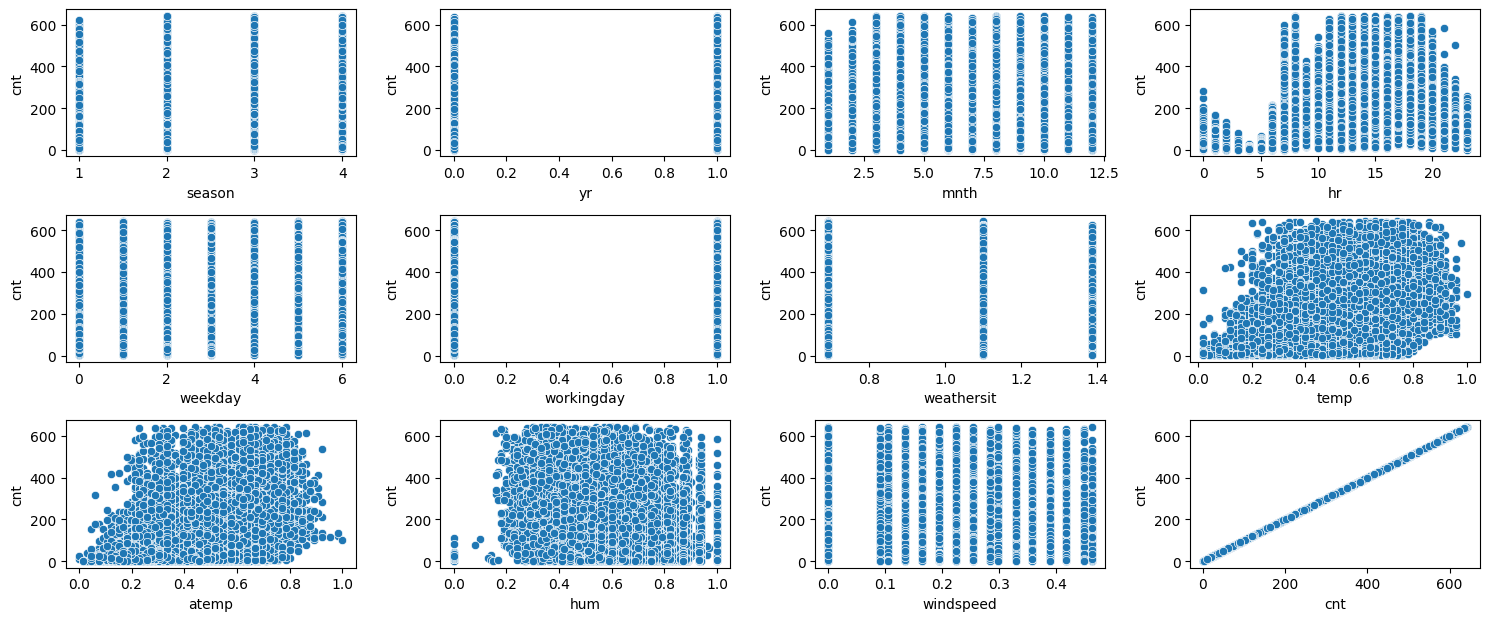

In [ ]:
# scatter plot to identify the relationship between cnt and remaining features
plt.figure(figsize=(15, 10))
for i, col in enumerate(new_data.columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=new_data,x=col,y='cnt')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

*Inference*

The plot you've provided is a grid of scatter plots showing the relationship between various features and the target variable (`cnt`), which represents the count of bike rentals in the dataset. Each scatter plot represents the correlation between `cnt` and a specific feature.

- **Hour** and **Temperature** have noticeable correlations with bike rental counts, with certain hours and warmer temperatures leading to higher rentals.
- **Season** and **Year** may show trends but are harder to interpret from scatter plots alone.
- **Humidity** and **Windspeed** appear to have little or no correlation with `cnt`.
  
These insights can help prioritize features for a predictive model, where continuous variables like `hr`, `temp`, and `atemp` may be stronger predictors.

**Split Data into Training and Testing Sets**

In [ ]:
#  define the features (X) and target (y)

from sklearn.model_selection import train_test_split


X = new_data.drop('cnt',axis=1)
y = new_data['cnt']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13230, 11) (3308, 11) (13230,) (3308,)


The provided code snippet performs a data preparation step for building a predictive model, focusing on splitting the dataset into training and testing sets. This code prepares the dataset for machine learning by selecting relevant features and splitting the data, ensuring that the subsequent modeling phase can produce reliable and interpretable results. By following these practices, the modeling process is made more robust, leading to better performance when predicting bike rental count presence based on the selected features.

**Feature Scaling**

In [ ]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




Scaling your features is a crucial preprocessing step in machine learning, especially when dealing with algorithms sensitive to the scale of input data. By applying StandardScaler, you ensure that your model performs better and converges more efficiently during training, leading to potentially improved predictive performance on unseen data.

## **Feature Importance :**


Trains a Random Forest Regressor  model to identify the most important features for predicting engagement. Uses feature importances and a bar chart to visualize the relative importance of each feature.

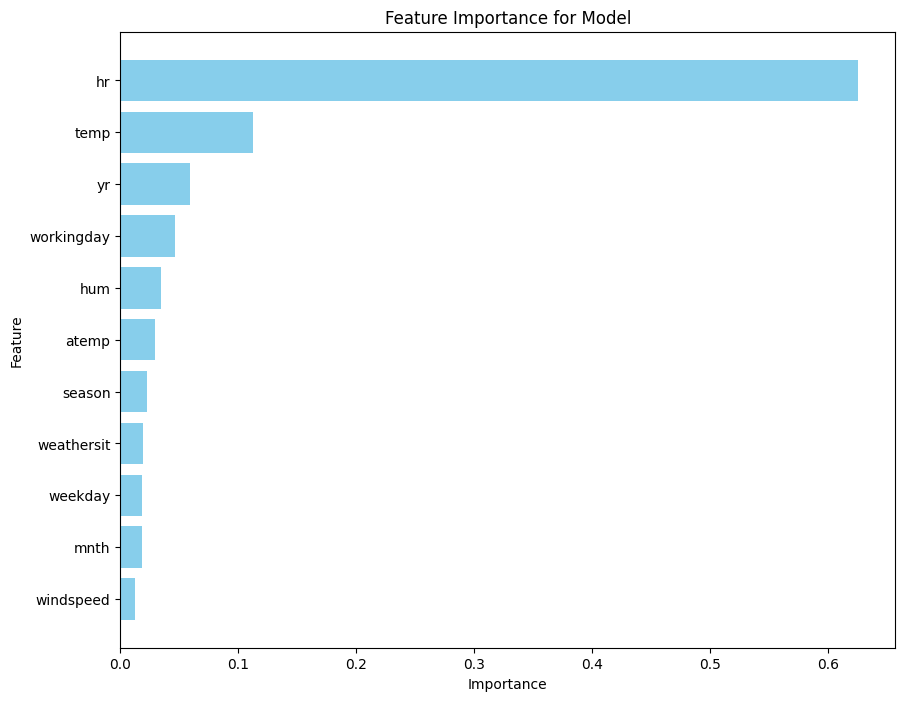

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined and cleaned
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Retrieve feature importances from the model
feature_importance = model.feature_importances_

# **Get column names from original DataFrame (X)**
# Assuming 'new_data' is your original DataFrame
feature_names = new_data.drop('cnt', axis=1).columns

# Create a DataFrame for easier plotting using feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature_names instead of X_train.columns
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance as a bar plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Model')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()




Horizontal Bar Plot: Displays each feature's importance in descending order. The features with the longest bars are the most influential in predicting the target variable (hr).

This code snippet performs the following tasks to train a Random Forest Regressor on a dataset and visualize the importance of its features.
This code snippet effectively trains a Random Forest Regressor to predict  based on various features in a dataset. It assesses and visualizes the importance of each feature, helping to identify which characteristics contribute most significantly to the model's predictions. This information can be crucial for understanding underlying factors associated with prediciton of bike rental demand.

# **Models**
In this project, regression models are used to predict the bike rental demands based on various features in the datasets.

Why Use Regression Models in This Project? Bike rental prediction is a continuous, quantitative task: the goal is to predict numerical values (i.e., rental cnt) rather than categorical outcomes. Regression models are designed to handle continuous variables, making them ideal for predicting bike rental count.

**Models Selected**

*   Linear Regressor Model
*   Decision Tree Regressor Model
*   Random Forest Regressor Model
*   Gradient Boosting Regressor Model
*   Support Vector Regressor

. We'll fit different models on the train data and observe their performance.

. We'll try to improve that performance by tuning some hyperparameters available for that algorithm.

. We'll use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.

. R-square - Coefficient of determination is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.

. Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.







**MODEL TRAINING AND EVALUATION (Without Feature Selection & Hyperparameter Tuning)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
 # Training r2 score
 models = {
'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    mae=mean_absolute_error(y_train,y_pred_train)
    mse=mean_squared_error(y_train,y_pred_train)
    rmse=np.sqrt(mse)
    r2=r2_score(y_train,y_pred_train)



    # Extract metrics from Regression  report
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)


,Model,MAE,MSE,RMSE,R2
1,Decision Tree Regressor,0.006652,0.128949,0.359095,0.999995
2,Random Forest Regressor,9.170731,226.026255,15.034170,0.990608
3,Gradient Boosting Regressor,42.851716,3783.139042,61.507228,0.842806
4,Support Vector Regressor,78.920184,13652.969207,116.845921,0.432701
0,Linear Regression,91.939528,14638.173602,120.988320,0.391764



This code evaluates multiple regression models by training them on the dataset, calculating performance metrics (MAE, MSE, RMSE, R²), and ranking them based on R² to identify the best-performing model.

In [ ]:
#Testing r2 score
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)




    # Extract metrics from regression report
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,MAE,MSE,RMSE,R2
2,Random Forest Regressor,24.982572,1629.277930,40.364315,0.933662
1,Decision Tree Regressor,33.838875,3319.000302,57.610766,0.864863
3,Gradient Boosting Regressor,44.031045,3909.512861,62.526097,0.840820
4,Support Vector Regressor,80.884686,14215.760830,119.229866,0.421190
0,Linear Regression,92.475041,14771.078904,121.536328,0.398580


Testing R2 score  is high in random forest regression .

This code tests multiple regression models on unseen test data, evaluates their performance using metrics (MAE, MSE, RMSE, R²), and ranks them to identify the best model for generalization.

**Learning curves**

This code visualizes learning curves to analyze how the Random Forest model's performance changes with increasing training data, helping identify overfitting or underfitting issues.

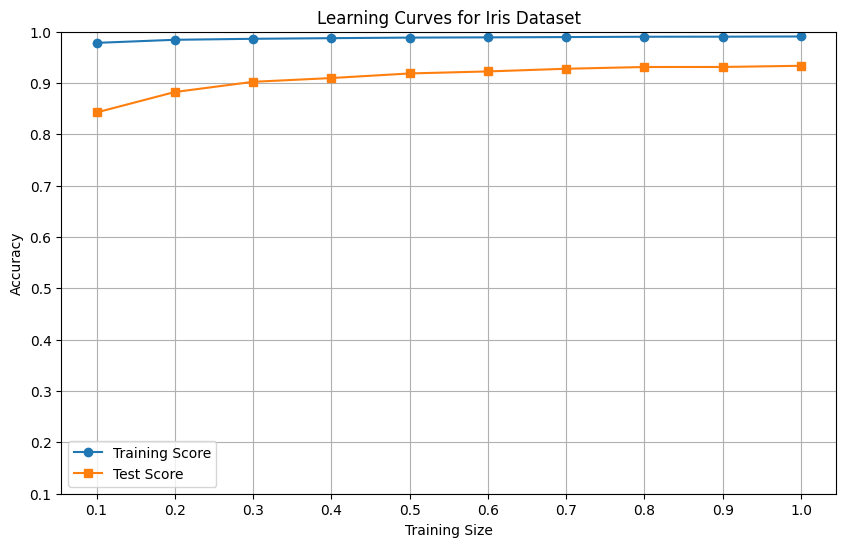

In [ ]:
# Define a function to plot learning curves
def plot_learning_curves(X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Sizes of training data to use
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        size = int(train_size * len(X_train))  # Number of training samples
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train[:size], y_train[:size])  # Fit the model

        # Calculate scores
        train_scores.append(r2_score(y_train[:size], model.predict(X_train[:size])))
        test_scores.append(r2_score(y_test, model.predict(X_test)))

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, marker='o', label='Training Score')
    plt.plot(train_sizes, test_scores, marker='s', label='Test Score')
    plt.title('Learning Curves for  Dataset')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.0)
    plt.ylim(0.1 ,1.0)
    plt.xticks(train_sizes)

    plt.legend()
    plt.grid()
    plt.show()

# Call the function to plot learning curves
plot_learning_curves(X_train, y_train, X_test, y_test)



The plot you’ve shared shows the **learning curves** for a model trained on the dataset. Learning curves are useful for understanding how well a model performs with varying sizes of training data and help diagnose if the model is underfitting or overfitting. Here are some insights based on this plot:

1. **Training Score**:
   - The blue line represents the training accuracy.
   - It is consistently high (close to 1.0) across all training sizes, indicating that the model performs very well on the training set.
   - This high training score suggests that the model is able to fit the training data accurately, which could point to low bias.

2. **Test Score**:
   - The orange line represents the test accuracy.
   - The test score starts lower but increases as the training size grows, eventually plateauing at around 0.9.
   - This suggests that with more data, the model generalizes better to unseen data, leading to a reduction in variance.

3. **Gap Between Training and Test Scores**:
   - There is a noticeable gap between the training and test scores, particularly at lower training sizes.
   - This gap indicates that the model might be slightly **overfitting** to the training data because it performs better on the training set than on the test set.
   - However, as the amount of training data increases, the gap reduces slightly, suggesting that more data helps the model generalize better.

4. **Conclusion**:
   - The model might benefit from more training data to improve generalization further.
   - Alternatively, regularization techniques could be applied to reduce overfitting, though the test score is already reasonably high.
   - Overall, this is a well-performing model, but some adjustments could slightly improve its generalization ability.

This plot indicates a good model that could still be optimized slightly for better generalization.

## **Feature Selection**
Identifying and selecting the most important features.

 **1. Select K Best**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


# Assuming 'columns' is a list containing your original column names
columns = ['season', 'yr', 'weekday', 'mnth',  'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','hr']

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features using the 'columns' list
selected_features_kbest = [columns[i] for i in selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)


Selected features using SelectKBest: ['season', 'yr', 'weekday', 'mnth', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'hr']


Here the Kbest excluded the weathersit from the features.

**Training using features selected using SelectKBest**


In [ ]:
X1=X[['season', 'yr', 'weekday', 'mnth', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'hr']]
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X1_train, y_train)
    y_pred = model.predict(X1_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)




    # Extract metrics from regression report
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,MAE,MSE,RMSE,R2
2,Random Forest Regressor,25.954844,1798.944429,42.413965,0.926754
1,Decision Tree Regressor,34.420949,3396.345602,58.278174,0.861714
3,Gradient Boosting Regressor,47.715259,4668.242462,68.324538,0.809927
4,Support Vector Regressor,81.749215,14428.657361,120.119346,0.412522
0,Linear Regression,92.462132,14766.364327,121.516930,0.398772



**2. Select From Model with Lasso (L1 Regularization)**

Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression model that includes an L1 regularization term.


In [ ]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assuming 'columns' is a list containing your original column names
columns = ['season', 'yr', 'weekday', 'mnth',  'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','hr']

# Lasso model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
X_lasso = selector_lasso.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)
# Print selected feature names
# Instead of using X_train.columns, use the original 'columns' list
selected_features_lasso = [columns[i] for i in selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)


Selected features using SelectFromModel with Lasso: ['season', 'yr', 'mnth', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hr']


Here the selected features using SelectFromModel with Lasso excluded the weekday features.

This code demonstrates feature selection using Lasso Regression combined with the SelectFromModel method to identify the most relevant features for predicting bike rental demand.

Why is This Code Used?

To identify and retain only the most significant features for modeling bike rental demand.

To reduce noise and redundancy in the dataset, improving the model’s interpretability and performance.

To provide insights into which factors most strongly influence bike rental behavior.

**Training using features selected using Lasso**

In [ ]:
X2=X[['season', 'yr', 'mnth', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hr']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X2_train, y_train)
    y_pred = model.predict(X2_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)

    # Extract metrics from regression report
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,MAE,MSE,RMSE,R2
2,Random Forest Regressor,27.822153,1906.845395,43.667441,0.922361
1,Decision Tree Regressor,36.515568,3445.920571,58.701964,0.859696
3,Gradient Boosting Regressor,45.825627,4249.933562,65.191514,0.826959
4,Support Vector Regressor,81.391441,14288.738664,119.535512,0.418219
0,Linear Regression,92.558618,14772.904050,121.543836,0.398505


**3. Select From Model with Ridge (L2 Regularization)**

This code demonstrates feature selection using Ridge Regression with SelectFromModel, which identifies the most relevant features based on the coefficients learned by the Ridge model.

In [ ]:
from sklearn.linear_model import Ridge


# Assuming 'columns' is a list containing your original column names
columns = ['season', 'yr', 'weekday', 'mnth', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hr']

# Ridge model (L2 regularization)
ridge_model = Ridge(alpha=0.01)  # Adjust alpha as needed

# SelectFromModel with Ridge (L2 regularization)
selector_ridge = SelectFromModel(ridge_model, threshold=0.001, max_features=10)
X_ridge = selector_ridge.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_ridge = selector_ridge.get_support(indices=True)

# Print selected feature names
selected_features_ridge = [columns[i] for i in selected_indices_ridge]
print("Selected features using SelectFromModel with Ridge:", selected_features_ridge)

Selected features using SelectFromModel with Ridge: ['season', 'yr', 'mnth', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hr']


Here the selected features using SelectFromModel with ridge excluded the weekday features.

This Code Used

To identify the most relevant features for predicting bike rental demand while managing multicollinearity.
To ensure the model includes a balanced combination of features without arbitrarily excluding correlated ones.
To prepare a reduced dataset with the most predictive features, optimizing model performance and interpretability.


This Ridge-based feature selection approach is particularly useful when multicollinearity exists among features, as it ensures that all relevant features are considered while penalizing their contributions proportionally.

In [ ]:
X3=X[['season', 'yr', 'mnth', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hr']]
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X3_train, y_train)
    y_pred = model.predict(X3_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)

    # Extract metrics from regression report
    metrics = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
    }
    results.append(metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Print the sorted DataFrame
(results_df_sorted)

,Model,MAE,MSE,RMSE,R2
2,Random Forest Regressor,27.723874,1879.992721,43.358883,0.923454
1,Decision Tree Regressor,36.949970,3703.770934,60.858614,0.849197
3,Gradient Boosting Regressor,45.825627,4249.933562,65.191514,0.826959
4,Support Vector Regressor,81.391441,14288.738664,119.535512,0.418219
0,Linear Regression,92.558618,14772.904050,121.543836,0.398505


# **Hyperparameter tuning**
Hyperparameter tuning is to improve the model's performance: Better settings can lead to more accurate predictions. It is the process of adjusting settings in a machine learning model to make it work better.

To improve the model's performance: Better settings can lead to more accurate predictions.

To prevent mistakes: Good tuning helps the model not to memorize the training data (overfitting) or to be too simple (underfitting).

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
# Hyperparameter tuning using GridSearchCV

# Gradient Boosting Regressor Model
gbr = GradientBoostingRegressor()
gbr_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]}
gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, error_score='raise')
gbr_grid.fit(X_train, y_train)

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr_params = {'max_depth': [None, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
dtr_grid = GridSearchCV(dtr, dtr_params, cv=5, error_score='raise')
dtr_grid.fit(X_train, y_train)

# Random Forest Regressor Model
rf = RandomForestRegressor()
rf_params = {'n_estimators': [100, 150, 200], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, error_score='raise')
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150, 200]})

The overall purpose of defining this structure is to facilitate hyperparameter tuning through methods like Grid Search or Randomized Search, allowing for systematic evaluation of various configurations to find the optimal model settings for improved prediction performance. By organizing models and their parameters , you can easily iterate through them in your tuning process.


 Defining the Models and Hyperparameter Grids

* Gradient Boosting Regressor (GBR):

  * gbr = GradientBoostingRegressor(): Initializes a Gradient Boosting Regressor model with default hyperparameters.
  * gbr_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]}: Defines a dictionary containing the hyperparameters to be tuned for the GBR model. Here, it's exploring different values for the number of estimators (n_estimators) and the learning rate (learning_rate).
* Decision Tree Regressor (DTR):
  * dtr = DecisionTreeRegressor(): Initializes a Decision Tree Regressor model with default hyperparameters.
  * dtr_params = {'max_depth': [None, 10, 15, 20], 'min_samples_split': [2, 5, 10]}: Defines a dictionary containing the hyperparameters to be tuned for the DTR model. It's exploring different values for the maximum depth of the tree (max_depth) and the minimum number of samples required to split an internal node (min_samples_split).
* Random Forest Regressor (RFR):
  * rf = RandomForestRegressor(): Initializes a Random Forest Regressor model with default hyperparameters.
  * rf_params = {'n_estimators': [100, 150, 200], 'max_depth': [None, 5, 10]}: Defines a dictionary containing the hyperparameters to be tuned for the RFR model. It's exploring different values for the number of estimators (n_estimators) and the maximum depth of each tree (max_depth).

*   Performing Grid Search with Cross-Validation

For each model (GBR, DTR, RFR), the code uses GridSearchCV to find the best hyperparameter combination. Here's what GridSearchCV does:

  * GridSearchCV(model, param_grid, cv=5, error_score='raise'): Initializes a GridSearchCV object.

 * model: The regression model to be tuned (e.g., gbr, dtr, rf).
 * param_grid: The grid of hyperparameters to search (e.g., gbr_params, dtr_params, rf_params).
 * cv=5: Specifies 5-fold cross-validation, meaning the data is split into 5 parts, and the model is trained and evaluated 5 times, each time using a different fold for validation.
 * error_score='raise': Raises an error if there is an issue during the model fitting process.
grid_search.fit(X_train, y_train): Fits the GridSearchCV object to the training data (X_train, y_train). This process trains the model with all possible combinations of hyperparameters from the grid and evaluates their performance using cross-validation.
*  Accessing the Best Model and Hyperparameters

 After fitting GridSearchCV, you can access:

 * best_params_: A dictionary containing the best hyperparameters found during the search.
 * best_estimator_: The estimator (model) with the best hyperparameters.
In Summary

The code you provided systematically explores different hyperparameter combinations for three regression models using Grid Search and cross-validation. This helps you find the best settings for your models to achieve better performance on your dataset.

In [ ]:
# The evaluate_model function to return the metrics
def evaluate_model(model, X_test, y_test):
       y_pred = model.predict(X_test)
       r2 = r2_score(y_test, y_pred)
       mse = mean_squared_error(y_test, y_pred)
       mae = mean_absolute_error(y_test, y_pred)

       return r2, mse, mae # Return the metrics

#Call the evaluate_model function and store the results:
gbr_results = evaluate_model(gbr_grid, X_test, y_test)
dtr_results = evaluate_model(dtr_grid, X_test, y_test)
rf_results = evaluate_model(rf_grid, X_test, y_test)

#Create a Pandas DataFrame
results_df = pd.DataFrame([gbr_results, dtr_results, rf_results],
                             index=['Gradient Boosting', 'Decision Tree', 'Random Forest'],
                             columns=['R-squared', 'Mean Squared Error', 'Mean Absolute Error'])
# Display the DataFrame
display(results_df)


,R-squared,Mean Squared Error,Mean Absolute Error
Gradient Boosting,0.895203,2573.855345,34.604936
Decision Tree,0.886996,2775.422241,31.294914
Random Forest,0.934291,1613.828421,24.868459


In [ ]:
# Best parameter of Gradient Boosting Regressor Model
print("Best Parameters (Gradient Boosting):", gbr_grid.best_params_)

# Best parameter of Decision Tree Regressor
print("Best Parameters (Decision Tree):", dtr_grid.best_params_)

# Best paramter of Random Forest Regressor Model
print("Best Parameters (Random Forest):", rf_grid.best_params_)


Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'n_estimators': 300}
Best Parameters (Decision Tree): {'max_depth': 15, 'min_samples_split': 10}
Best Parameters (Random Forest): {'max_depth': None, 'n_estimators': 150}


In [ ]:
print(f"Gradient Boosting best score: {gbr_grid.best_score_}")
print(f"Decision Tree best score: {dtr_grid.best_score_}")
print(f"Random Forest best score: {rf_grid.best_score_}")

Gradient Boosting best score: 0.89125108192652
Decision Tree best score: 0.8875297708647656
Random Forest best score: 0.931700082815673


After all the analysis, we find that the best model for this data set is random forest regressor.

In [ ]:
#  Save the best model
# Choose the model with the highest performance metrics
best_model = max([gbr_grid,dtr_grid, rf_grid], key=lambda model: model.best_score_)
print(f"\nBest model: {best_model.best_estimator_}")


Best model: RandomForestRegressor(n_estimators=150)


In [ ]:
import joblib
# Save the best model using joblib
joblib.dump(best_model, 'Best_predict_bike_rental_model.pkl')

print("\nBest model saved as 'best_predict_bike_rental_model.pkl'")


Best model saved as 'best_predict_bike_rental_model.pkl'


# **Pipeline**

 Pipeline is a sequence of interconnected processing elements or components arranged in a sequence to automate and streamline complex workflows, commonly used in data processing, machine learning, and software development.



In [ ]:

# Pipeline
# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("/content/Renatl Bike Sharing system hr.csv")

# Drop unnecessary columns
df.drop(columns=['instant','casual','registered'], inplace=True)

# Define features and target variable
X= df.drop('cnt', axis=1)
y = df['cnt']

# Identify numerical features
numerical_features=['season', 'yr', 'weekday', 'mnth',  'workingday', 'weathersit',
                    'temp', 'atemp', 'hum', 'windspeed','hr']

# Define individual transformers for preprocessing
trf_numerical = Pipeline(steps=[
    ('scaler',StandardScaler())  # Scale the numerical features
])

# Create the main ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trf_numerical, numerical_features),
    ],
    remainder='drop'  # Drop any remaining columns (none in this case)
)

# Create the full pipeline with a Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Regressor', RandomForestRegressor(random_state=42))  # Regressor
])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

# Display accuracy on the test set
print("R2 Score on the test set:", r2)
print("Mean Absolute Error on the test set:", mae)
print("Mean Squared Error on the test set:", mse)
print("Root Mean Squared Error on the test set:", rmse)


R2 Score on the test set: 0.9430982153806976
Mean Absolute Error on the test set: 25.082011099923285
Mean Squared Error on the test set: 1801.8184157486755
Root Mean Squared Error on the test set: 42.447831696668274


In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'yr', 'weekday',
                                                   'mnth', 'workingday',
                                                   'weathersit', 'temp',
                                                   'atemp', 'hum', 'windspeed',
                                                   'hr'])])),
                ('Regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Save the pipeline to a file
joblib.dump(pipeline, 'Bike_ rental_pipeline.joblib')

['Bike_ rental_pipeline.joblib']

**Try  it on some unseen data**

In [ ]:

# Prepare unseen data
unseen_data = pd.DataFrame({
    'season': [1, 4, 2, 3],
    'yr': [0, 1, 1, 1],
    'mnth': [1, 12, 4, 9],
    'hr': [11, 16, 14, 16],
    'weekday': [5, 0, 6, 2],
    'workingday': [1, 0, 0, 1],
    'weathersit': [1, 2, 2, 3],
    'temp': [.18, .38, .64, .6],
    'atemp': [.17, .39, .62, .55],
    'hum': [.51, .82, .27, .88],
    'windspeed': [.28, .1, .45, .3]
})
unseen_data



,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,11,5,1,1,0.18,0.17,0.51,0.28
1,4,1,12,16,0,0,2,0.38,0.39,0.82,0.10
2,2,1,4,14,6,0,2,0.64,0.62,0.27,0.45
3,3,1,9,16,2,1,3,0.60,0.55,0.88,0.30


In [ ]:
# Load the pipeline from the file
loaded_pipeline = joblib.load('/content/Bike_ rental_pipeline.joblib')

# Now you can use the loaded pipeline to make predictions
unseen_predictions = loaded_pipeline.predict(unseen_data)
print("Predictions for unseen data :", unseen_predictions)


Predictions for unseen data : [ 46.29 385.62 617.82 224.79]


# **Conclusion**

The analysis of the prediciting the bike rental demand  dataset has yielded valuable insights into the factors that influence counts of bike rental demand .

Significant Predictors: Variables like temp, hr, weathersit, hum, and season should be emphasized in model building.




This project successfully developed a machine learning model to predict rental bike count on different weather conditions. We performed data preprocessing, feature selection, and model training using multiple algorithms. By tuning the hyperparameters of the Random Forest Regressor, we achieved a highly accurate and generalized model. The saved model can now be used for real-time predictions.

# **Future Work Suggestions:**
*  Temporal Analysis and Forecasting:

    * Trend Analysis: Study temporal patterns such as daily, weekly, and seasonal trends in bike rentals.
    * Forecasting: Use time series models like ARIMA, SARIMA, or machine learning models (e.g., LSTM) to predict bike rental demand. This could be useful for resource planning.
*  Weather Impact on Rentals:

 Analyze how weather conditions (temperature, humidity, wind speed) affect rental counts. Understanding these relationships could improve predictions during different weather conditions.


* Peak Demand Analysis:

   Identify peak hours for bike rentals by exploring hourly patterns. This could help with optimal bike distribution across stations during high-demand periods.
